# 1. Data Loading, Data Analysis, Data Cleaning , Data Manipulation

- A. Declaring Mandatory Libraries
- B. Read excel sheet data into data frame
- C. Removal of null values from the dataset
- D. Removal of rows which has unique values in dataset
- E. Removal of duplicate rows in dataset
- F. Dropping un-necessary rows 
- G. Writing re-usable Functions
- H. Data Conversion
- I. Handling OutLiers
- J. Imputing Data



####         1.A Declaring Mandatory Libraries

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### 2.B Read excel sheet data into data frame

In [238]:
loan_df = pd.read_csv('loan.csv')

In [240]:
# loan_df - Display top 5 Loan data records on high level 

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### 3.B Removal of null values in the dataset

In [242]:
loan_df.isna().sum().sort_values()

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [118]:
# After Running above code snippet, it is observed that there are many null values are present in the data frame columns which needs to be fixed


###### Below is the primary analysis to identify columns with null values

In [244]:
# max_rows -> maximum number of rows in data frame
max_rows = loan_df.shape[0]
expected_to_be_dropped_columns = 0

for col in sorted(loan_df.columns):
    if loan_df[col].isna().sum() == max_rows:
        expected_to_be_dropped_columns = expected_to_be_dropped_columns + 1


print(f'No of coulmns which are expected to be deleted as those are nulls = {expected_to_be_dropped_columns}')        



No of coulmns which are expected to be deleted as those are nulls = 54


In [246]:
# since 54 columns has full null values, below code snippets are used to delete such 54 columns 
# Before removing 54 columns from data frame
loan_df.shape

(39717, 111)

In [250]:
# Drop 54 columns from data frame
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

In [123]:
# We can observe that columns size has been reduced from "111" to "57" i.e we have removed "54" null valueed columns

####  1.D. Removal of rows which has unique values in dataset

##### It is always better to remove columns which has the same values in all rows as this data is irrelavant for our primary analysis . below code snippets are related to data clean up of columns which has data with same value in all rows


In [252]:
remove_nullcolumns_list = []
for i in loan_df.columns:
    if loan_df[i].nunique() == 1:
        remove_nullcolumns_list.append(i)
    

# Removing columns which has same values 
loan_df.drop(remove_nullcolumns_list, axis = 1, inplace = True)

In [254]:
# Now we can observe that columns size has been reduced from 57 to 48 
loan_df.shape

(39717, 48)

####  1.E. Removal of duplicate rows in dataset

In [256]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


###### No additional operation is required as there are no duplicate records

####  1.F. Dropping un-necessary rows 

In [258]:

#To check if there is unnessasry rows or not.
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

###### Since we are doing analysis on Loan applications, There is no point in considering Loan sattus with 'current'

In [260]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df.shape #  row count has been reduced to "38577" from  "39717" 

(38577, 48)

#### Removing columns where missing data is more than equal to 65%

###### These columns are not required for data analysis

In [262]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape
 
 #  column count has been reduced to "45" from  "48" 

(38577, 45)

In [264]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

###### After detailed analysis of all columns and relavent data, it is better to remove below coulmns for further analysis

In [266]:
columns_drop = [
 'id',
'member_id',
'emp_title',
'url',
'desc',
'title',
'zip_code',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_credit_pull_d'
]

loan_df.drop(columns_drop, axis = 1, inplace = True)

In [268]:
loan_df.shape # column size has been reduced from 45 to 19

(38577, 19)

In [270]:
# Sorting of Dataframe
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,171.62,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,119.66,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,649.91,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,357.48,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,161.03,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,80.90,2500,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,281.94,8500,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,0.00,5000,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,0.00,5000,Fully Paid,NaN,other,A2,36 months,Not Verified


####  1.H. Data Conversion

In [272]:
# below coulmn datatypes are given in int hense converting those to float for better calculations 
loan_df['funded_amnt'] = loan_df['funded_amnt'].astype(float)
loan_df['loan_amnt'] = loan_df['loan_amnt'].astype(float)


In [274]:
# Below coulmn(trem) datatype is given in object hense converting those to int and removing 'months' string  for better calculations . e.g - "36 months" to "36"
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [276]:
# Below coulmn(int_rate) datatype is given in object hense converting those to float for better calculations . e.g - "13.75%" to "13.75"
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [278]:
# Rounding of below coulmns for better calculations
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

In [280]:
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,Dec-11,171.62,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,Dec-11,119.66,2500.0,Charged Off,0.0,car,C4,60,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,Dec-11,649.91,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,Dec-11,357.48,10000.0,Fully Paid,0.0,other,C1,36,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,Dec-11,161.03,5000.0,Fully Paid,0.0,wedding,A4,36,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500.0,1075.0,A,MORTGAGE,78.42,8.07,Jul-07,80.90,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.0,C,RENT,275.38,10.28,Jul-07,281.94,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.0,A,MORTGAGE,156.84,8.07,Jul-07,0.00,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000.0,650.0,A,MORTGAGE,155.38,7.43,Jul-07,0.00,5000.0,Fully Paid,NaN,other,A2,36,Not Verified


In [286]:
# Conversion of the column issue_d from string to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

####  1.I. Handling OutLiers

In [288]:
loan_df.annual_inc.value_counts().sort_index(ascending=False)
#loan_df.shape

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: count, Length: 5215, dtype: int64

In [290]:
# Since the analysis is on the annual_income to decide the loan approvals, we need to perform detailed analysis on annual income columns
# For that it is essentail to view outliers. 
# Below are the code snippet for IQR,Lower Bound and Upper bound

q1 = loan_df['annual_inc'].quantile(0.25)
q3 = loan_df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr

annual_inc_set1 = loan_df.annual_inc > lowerbound
annual_inc_set2 = loan_df.annual_inc < upperbound

expected_income_set = annual_inc_set1 & annual_inc_set2

# Filtering rows with expected annual income range between lower and upper bound
loan_df = loan_df[expected_income_set]

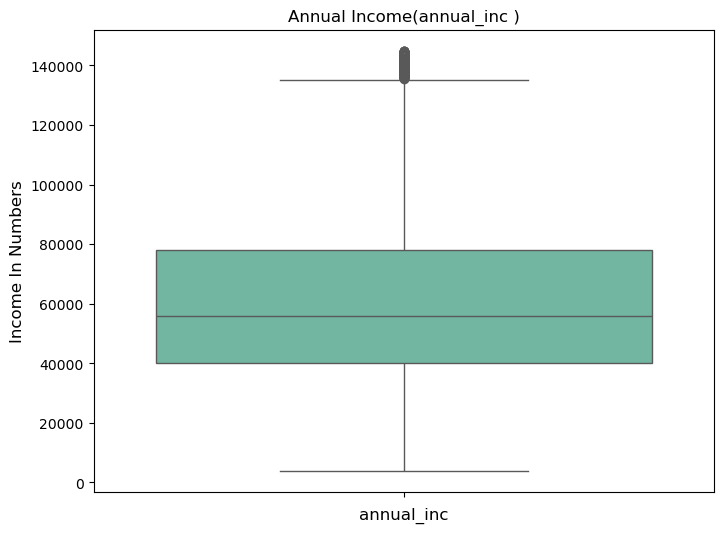

In [292]:
# Box Plot for annual income
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_df['annual_inc'], orient='h', palette='Set2')
plt.title('Annual Income(annual_inc )' )
plt.xlabel('annual_inc', fontsize=12)
plt.ylabel('Income In Numbers', fontsize=12)
plt.show()


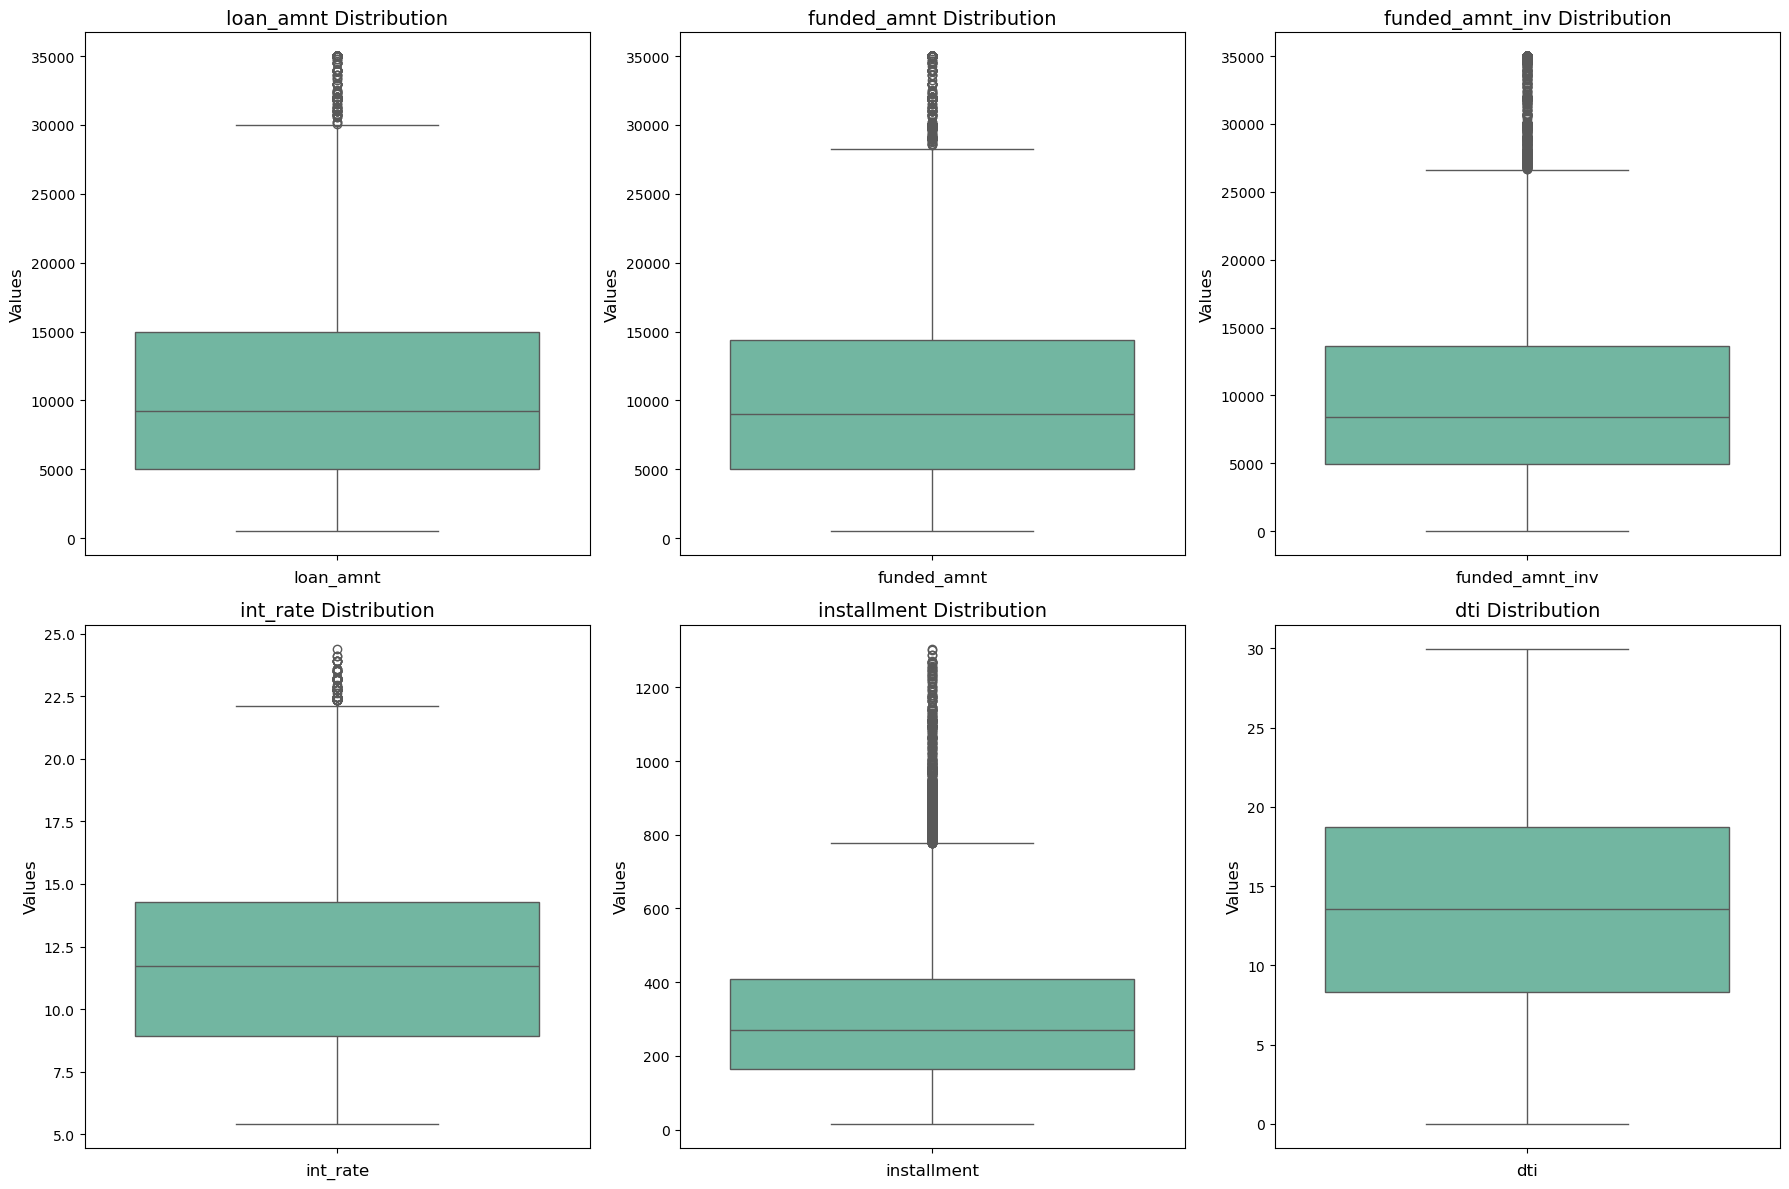

In [294]:
# List of columns to create box plots for
columns_to_plot = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']

# Create the figure and define the grid layout (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and its corresponding axis in the subplot grid
for i, column in enumerate(columns_to_plot):
    # Clean data by removing NaN values (optional, based on your data)
    loan_df_clean = loan_df.dropna(subset=[column])
    
    # Create the boxplot for each column
    sns.boxplot(y=loan_df_clean[column], orient='h', palette='Set2', ax=axes[i])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'{column} Distribution', fontsize=14)
    axes[i].set_xlabel(f'{column}', fontsize=12)
    axes[i].set_ylabel('Values', fontsize=12)

# Adjust the layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

### Key Insights from Applicant Data:

- **Annual Income (`annual_inc`)**:  
  The majority of applicants have an annual income between **40,000 USD** and **75,000 USD**.

- **Loan Amount (`loan_amnt`)**:  
  The largest number of applicants requested a loan amount between **5,000 USD** and **15,000 USD**.

- **Funded Amount (`funded_amnt`)**:  
  Most applicants received a funded loan amount between **5,000 USD** and **14,000 USD**.

- **Amount Invested by Investors (`funded_amnt_inv`)**:  
  The majority of applicants had their loan funded by investors with amounts ranging from **5,000 USD** to **14,000 USD**.

- **Interest Rate (`int_rate`)**:  
  The interest rates charged on most loans fall between **9%** and **14%**.

- **Monthly Installment (`installment`)**:  
  The typical monthly installment amount for most applicants is between **160 USD** and **440 USD**.

- **Debt-to-Income Ratio (`dti`)**:  
  The debt-to-income ratio for most applicants ranges between **8%** and **18%**.


####         1.J. Imputing Data

In [297]:
loan_df.emp_length.isna().sum()

1015

In [301]:
# Analysis of loan applicants Annual income whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

count      1015.000000
mean      42537.019271
std       24044.887728
min        4200.000000
25%       24468.000000
50%       37404.000000
75%       55780.000000
max      144000.000000
Name: annual_inc, dtype: float64

In [305]:
# Mode --  Most reccurring  Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [307]:
# Most  reccurring value of employment length
loan_df.emp_length.value_counts()

emp_length
10+ years    7923
< 1 year     4338
2 years      4112
3 years      3832
4 years      3206
1 year       3052
5 years      3051
6 years      2078
7 years      1646
8 years      1347
9 years      1154
Name: count, dtype: int64

In [311]:
loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [313]:
loan_df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,171.62,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,119.66,2500.0,Charged Off,0.0,car,C4,60,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,649.91,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,357.48,10000.0,Fully Paid,0.0,other,C1,36,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,161.03,5000.0,Fully Paid,0.0,wedding,A4,36,Source Verified


###### The "emp_length" field contains 1,015 missing values, which likely indicates that these individuals are either not employed or are self-employed (business owners). Given their relatively high average annual income, we have assumed they are business owners. To address the missing data, we have filled in their employment duration with the mode value for "emp_length," which is 10+ years.

In [315]:
loan_df.emp_length.mode()[0] 

'10+ years'

In [317]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [319]:
# Validate that employement length is not having any null values
loan_df.emp_length.isna().sum()

0

###### "Mapping the employment duration to corresponding years in integer format"


In [321]:
employment_duration_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Apply the mapping to the 'emp_length' column to convert it to integer values
loan_df['emp_length'] = loan_df['emp_length'].map(employment_duration_mapping)

In [323]:
loan_df.emp_length.value_counts()

emp_length
10    8938
0     4338
2     4112
3     3832
4     3206
1     3052
5     3051
6     2078
7     1646
8     1347
9     1154
Name: count, dtype: int64

In [327]:
# Current value count of Home Ownership
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          93
NONE            3
Name: count, dtype: int64

In [329]:
#Replacing NONE with OTHER which is nearest minimal value
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [331]:
# Current value count of Home Ownership
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          96
Name: count, dtype: int64

In [333]:
# Current value count of verification status
loan_df.verification_status.value_counts()

verification_status
Not Verified       16306
Verified           11269
Source Verified     9179
Name: count, dtype: int64

###### Updating the 'Source Verified' values to 'Verified', as both terms indicate that the loan applicant's income source has been verified.

In [335]:
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)
loan_df.verification_status.value_counts()

verification_status
Verified        20448
Not Verified    16306
Name: count, dtype: int64

In [337]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    34488
1.0     1601
2.0        5
Name: count, dtype: int64

In [339]:
loan_df.pub_rec_bankruptcies.isna().sum()

660

In [341]:
loan_df[loan_df.pub_rec_bankruptcies.isna()]

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
35006,NY,110000.0,7.07,0,15000.0,14875.00,A,MORTGAGE,476.58,8.94,2009-09-01,1919.13,15000.0,Fully Paid,NaN,credit_card,A5,36,Not Verified
35058,TX,80800.0,14.97,3,3000.0,2988.24,C,MORTGAGE,102.92,14.26,2009-09-01,111.23,3000.0,Fully Paid,NaN,credit_card,C5,36,Not Verified
35362,MI,60000.0,11.08,0,4000.0,3892.26,B,MORTGAGE,131.22,11.14,2009-08-01,131.22,4000.0,Charged Off,NaN,car,B1,36,Not Verified
38443,NJ,37152.0,2.26,10,2300.0,589.61,D,RENT,77.69,13.17,2008-08-01,77.78,2300.0,Fully Paid,NaN,moving,D2,36,Verified
38717,OH,75000.0,16.08,0,6000.0,500.00,A,MORTGAGE,188.02,8.00,2008-05-01,189.36,6000.0,Fully Paid,NaN,other,A3,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5,5000.0,700.00,B,MORTGAGE,158.30,8.70,2007-07-01,159.83,5000.0,Fully Paid,NaN,credit_card,B1,36,Not Verified
39712,CO,110000.0,11.33,4,2500.0,1075.00,A,MORTGAGE,78.42,8.07,2007-07-01,80.90,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3,8500.0,875.00,C,RENT,275.38,10.28,2007-07-01,281.94,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,0,5000.0,1325.00,A,MORTGAGE,156.84,8.07,2007-07-01,0.00,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified


###### 'pub_rec_bankruptcies' has  660 null values . These rows must be dropped as they cannot be imputed.

In [343]:
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [345]:
#Check if there are any remaining null values in the dataset
loan_df.isna().sum()

addr_state              0
annual_inc              0
dti                     0
emp_length              0
funded_amnt             0
funded_amnt_inv         0
grade                   0
home_ownership          0
installment             0
int_rate                0
issue_d                 0
last_pymnt_amnt         0
loan_amnt               0
loan_status             0
pub_rec_bankruptcies    0
purpose                 0
sub_grade               0
term                    0
verification_status     0
dtype: int64

In [349]:
loan_df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,171.62,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,0,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,119.66,2500.0,Charged Off,0.0,car,C4,60,Verified
2,IL,12252.0,8.72,10,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,649.91,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,357.48,10000.0,Fully Paid,0.0,other,C1,36,Verified
5,AZ,36000.0,11.20,3,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,161.03,5000.0,Fully Paid,0.0,wedding,A4,36,Verified


### 2. Data Analysis
- **2.1 Derived Columns**<br>
    - Objective: Creating new columns derived from existing data.<br>
- **2.2 Univariate Analysi**<br>
    - Objective: Analyzing each variable individually, including segmented univariate analysis.<br>
- **2.3 Bivariate Analysis**<br>
    - Objective: Analyzing relationships between pairs of variables.

   #### 2.1 Derived Columns
In this section, we will create several new columns that provide useful derived metrics for further analysis:

1. **Extract the following date-related attributes** from the `issue_d` column:
   - *Month* (`issue_m`)
   - *Year* (`issue_y`)
   - *Quarter* (`issue_q`)

2. **Generate a new column** `loan_paid` that assigns:
   - `'Yes'` if the loan status is `"Fully Paid"`
   - `'No'` if the loan status is `"Charged off"`

3. **Bucketize numerical features** into categorical bins for easier analysis:
   - *Loan Amount*: `loan_amount_bucket`
   - *Interest Rate*: `interest_rate_bucket`
   - *Annual Income*: `annual_income_bucket`

###### 2.1.1. Extracting Month (issue_m), Year (issue_y), and Quarter (issue_q) from the "issue_d" Column


In [377]:

loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [381]:
def bucketing_data(column, thresholds, labels) -> str:
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [387]:
## below code is the define which quarter the loan was applied
month_thresholds = [4, 7, 9]
quarter_label = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucketing_data, args=(month_thresholds, quarter_label))

In [397]:
loan_df[['issue_d','issue_m','issue_y','issue_q']]

,issue_d,issue_m,issue_y,issue_q
0,2011-12-01,12,2011,Q4
1,2011-12-01,12,2011,Q4
2,2011-12-01,12,2011,Q4
3,2011-12-01,12,2011,Q4
5,2011-12-01,12,2011,Q4
...,...,...,...,...
39562,2007-11-01,11,2007,Q4
39573,2007-11-01,11,2007,Q4
39623,2007-10-01,10,2007,Q4
39666,2007-08-01,8,2007,Q3


In [415]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     30777
Charged Off     5317
Name: count, dtype: int64

###### 2.1.2. Create a New Column `loan_paid` Based on the `loan_status` Column

In this step, we will create a new column called `loan_paid`. This column will have the following values:

- *'Yes'* if the `loan_status` is "Fully Paid"
- *'No'* if the `loan_status` is "Charged off"

In [417]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

In [419]:
loan_df['loan_paid'].value_counts()

loan_paid
Yes    30777
No      5317
Name: count, dtype: int64

###### 2.1.3. Categorizing Data into Buckets for Key Financial Metrics

In this section, we will create several categorical buckets for different financial attributes to simplify analysis:

- *Funded Amount*: The `funded_amnt` will be classified into specific ranges (`funded_amnt_bucket`).
- *Debt-to-Income Ratio*: The `dti` will be bucketed into categories (`dti_bucket`).
- *Loan Amount*: We will categorize the `loan_amount` into predefined buckets (`loan_amount_bucket`).
- *Interest Rate*: The `interest_rate` will be grouped into categories (`interest_rate_bucket`).
- *Annual Income*: The `annual_income` will be segmented into brackets (`annual_income_bucket`).


In [447]:
# Bucketting Funded Amount
thresholds_funded_amnt = [5000, 10000, 15000]
labels_funded_amnt = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucketing_data, args=(thresholds_funded_amnt, labels_funded_amnt))

In [449]:
loan_df[['funded_amnt', 'funded_amnt_bucket']].value_counts()

funded_amnt  funded_amnt_bucket
10000.0      10k - 15k             2546
12000.0      10k - 15k             2032
5000.0       5k - 10k              1936
6000.0       5k - 10k              1804
15000.0      15k - above           1585
                                   ... 
23375.0      15k - above              1
23425.0      15k - above              1
14325.0      10k - 15k                1
23475.0      15k - above              1
500.0        0 - 5k                   1
Name: count, Length: 983, dtype: int64

In [455]:
# Debt-to-Income Ratio Bucketting
thresholds_dti = [8, 12, 16, 20]
labels_dti = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucketing_data, args=(thresholds_dti, labels_dti))

In [457]:
loan_df[['dti', 'dti_bucket']].value_counts()

dti    dti_bucket
0.00   Very Low      156
12.00  Medium         40
18.00  High           40
19.20  High           39
13.20  Medium         38
                    ... 
27.82  Very High       1
26.06  Very High       1
27.87  Very High       1
27.88  Very High       1
29.99  Very High       1
Name: count, Length: 2848, dtype: int64

In [426]:
# loan_amnt categorisation
thresholds_loan_amnt = [5000, 10000, 15000]
labels_loan_amount = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucketing_data, args=(thresholds_loan_amnt, labels_loan_amount))

In [432]:
loan_df[['loan_amnt', 'loan_amnt_bucket']].value_counts()

loan_amnt  loan_amnt_bucket
10000.0    10K - 15K           2630
12000.0    10K - 15K           2119
5000.0     5K - 10K            1948
6000.0     5K - 10K            1815
15000.0    15K - above         1684
                               ... 
16325.0    15K - above            1
16225.0    15K - above            1
15975.0    15K - above            1
15950.0    15K - above            1
12050.0    10K - 15K              1
Name: count, Length: 843, dtype: int64

In [434]:
# int_rate Bucketting
bins_int_rate = [5, 9, 13, 17, 21]
labels_int_rate = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucketing_data, args=((bins_int_rate, labels_int_rate)))

In [436]:
loan_df['int_rate_bucket'].value_counts()

int_rate_bucket
9%-13%     13105
13%-17%    10440
5%-9%       9302
17%-21%     2950
21%-25%      297
Name: count, dtype: int64

In [438]:
# Annual Income Bucketting
thresholds_annual_inc = [40000, 50000, 60000, 70000, 80000]
labels_annual_inc = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucketing_data, args=(thresholds_annual_inc, labels_annual_inc))

In [444]:
loan_df[['annual_inc', 'annual_inc_bucket']].value_counts()

annual_inc  annual_inc_bucket
60000.00    60k - 70k            1441
50000.00    50k - 60k            1016
40000.00    40k - 50k             841
45000.00    40k - 50k             793
30000.00    0 - 40k               791
                                 ... 
47881.47    40k - 50k               1
47885.15    40k - 50k               1
47908.00    40k - 50k               1
47928.00    40k - 50k               1
144997.00   80k - above             1
Name: count, Length: 4762, dtype: int64

### 3.2 Univariate Analysis

In this section, we will perform univariate analysis on various fields in the dataset. The analysis will be broken down into two categories: **Categorical Variables** and **Quantitative Variables**.

#### 1. Categorical Variables

1. **Ordered Categorical Data**
   - *Grade* (`grade`)
   - *Sub Grade* (`sub_grade`)
   - *Term* (`term`)
   - *Employment Length* (`emp_length`)
   - *Issue Year* (`issue_y`)
   - *Issue Month* (`issue_m`)
   - *Issue Quarter* (`issue_q`)

2. **Unordered Categorical Data**
   - *Address State* (`addr_state`)
   - *Loan Purpose* (`purpose`)
   - *Home Ownership* (`home_ownership`)
   - *Loan Status* (`loan_status`)
   - *Loan Paid* (`loan_paid`)

#### 2. Quantitative Variables

1. *Bucketing of Interest Rate* (`int_rate_bucket`)
2. *Bucketing of Annual Income Bucket* (`annual_inc_bucket`)
3. *Bucketing of Loan Amount Bucket* (`loan_amnt_bucket`)
4. *Bucketing of Funded Amount* (`funded_amnt_bucket`)
5. *Bucketing ofDebt-to-Income Ratio (DTI)* (`dti_bucket`)
6. *Monthly Installment* (`installment`)


In [549]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, 
                   figsize=(20, 10), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the subplot grid
    num_plots = len(x_column)
    ncols = 3  # Number of columns in the subplot grid
    nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Compute number of rows required

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes to easily index them

    # Plot each bar plot in a subplot
    for idx, cat_var in enumerate(x_column):
        ax = axes[idx]  # Select subplot
        y_data = filtered_dataframe[cat_var].value_counts()  # Count values for the current category
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, ax=ax, hue=hue_column)

        # Display frequency on top of the bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', rotation=freq_rotation)
        
        # Set the title and labels
        if title:
            ax.set_title(f'Bar Plot of {cat_var}', fontsize=14)
        if xlabel:
            ax.set_xlabel(cat_var, fontsize=12)
        if ylabel:
            ax.set_ylabel(f'Frequency of {cat_var}', fontsize=12)

        # Rotate x-axis labels
        ax.tick_params(axis='x', rotation=x_tick_rotation)

    # Hide any empty subplots if there are fewer than expected
    for i in range(num_plots, len(axes)):
        axes[i].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

###### 2.2.1.1 Ordered Categorical Data

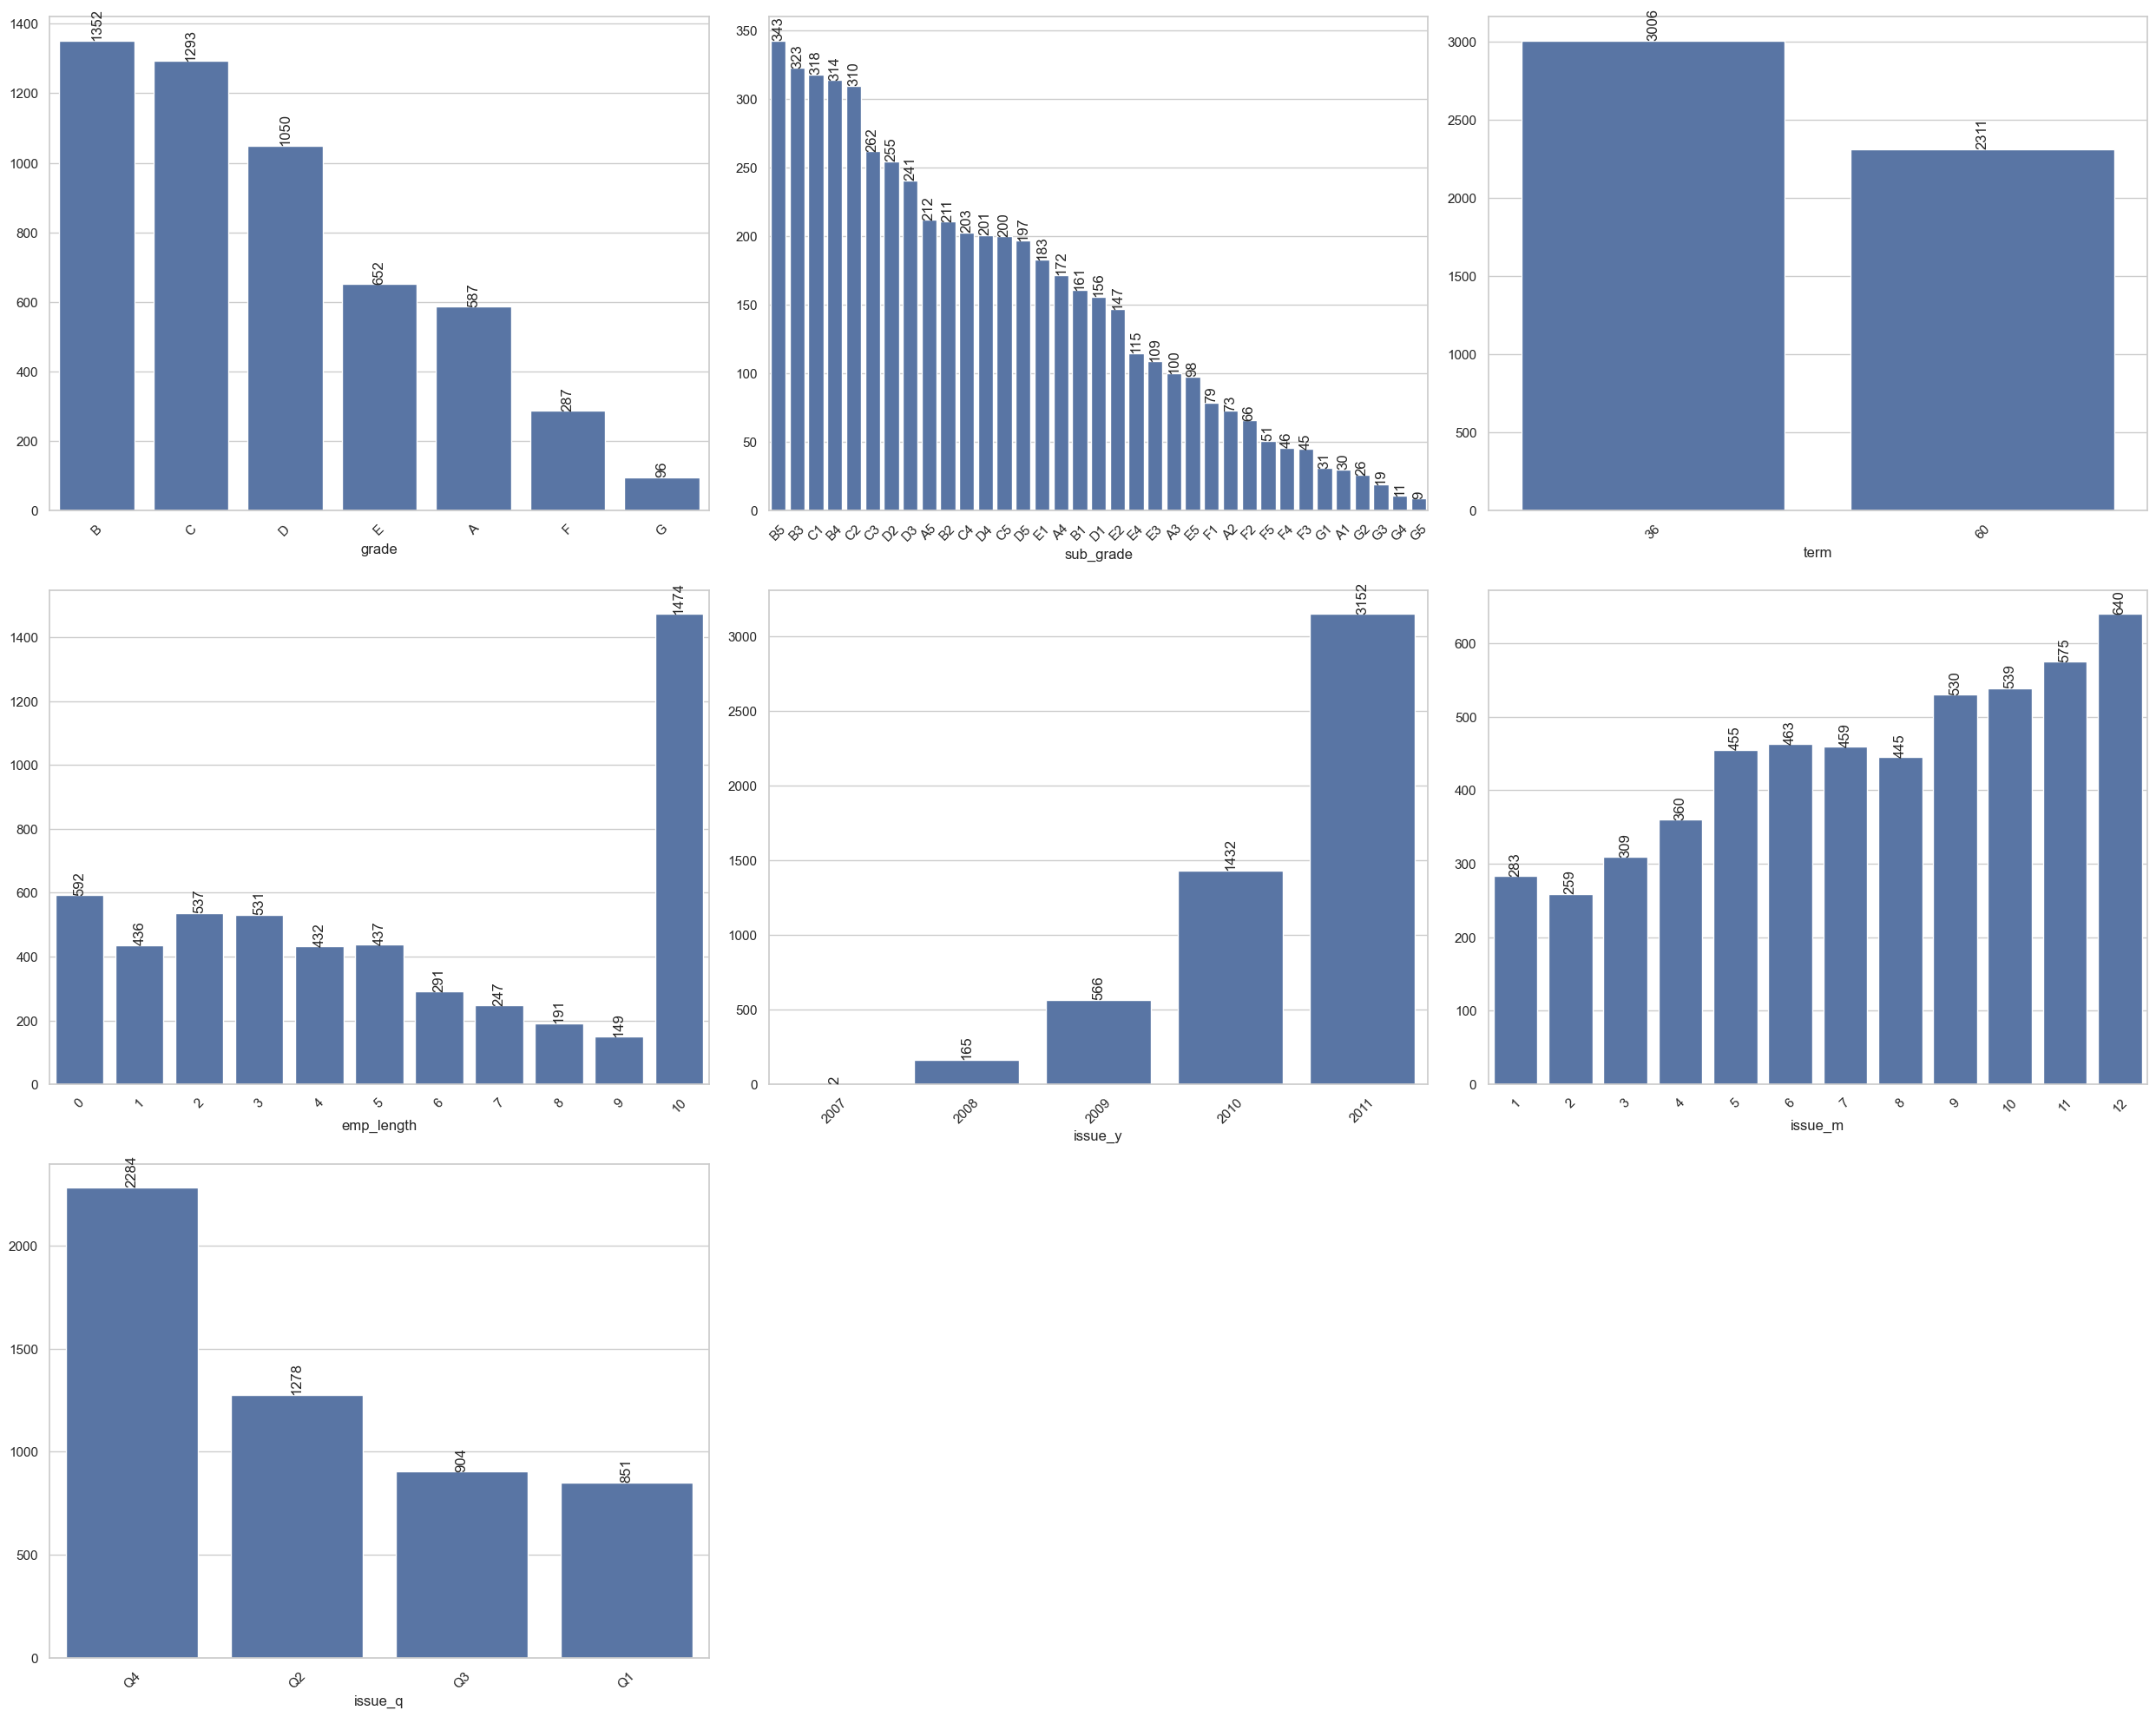

In [496]:
# List of categorical variables you want to plot
cat_vars = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']
# Call the function to plot all the categorical variables in one figure
plot_bar_graph(
    loan_df,
    x_column = cat_vars,
    y_column = cat_vars,  # y_column will be the same as x_column here, as we are plotting counts
    title = None,  # We don't need to pass the title here as it's done per plot
    xlabel = None,  # Individual x_labels will be set within the loop
    ylabel = None,  # Individual y_labels will be set within the loop
    figsize=(25, 20),  # Adjust size for multiple plots
    x_tick_rotation=45,
    freq_rotation=90,
    filter_column='loan_status',
    filter_value='Charged Off'  # Optional: filter based on loan status
)


###### 3.2.1.2. Unordered Categorical Variables

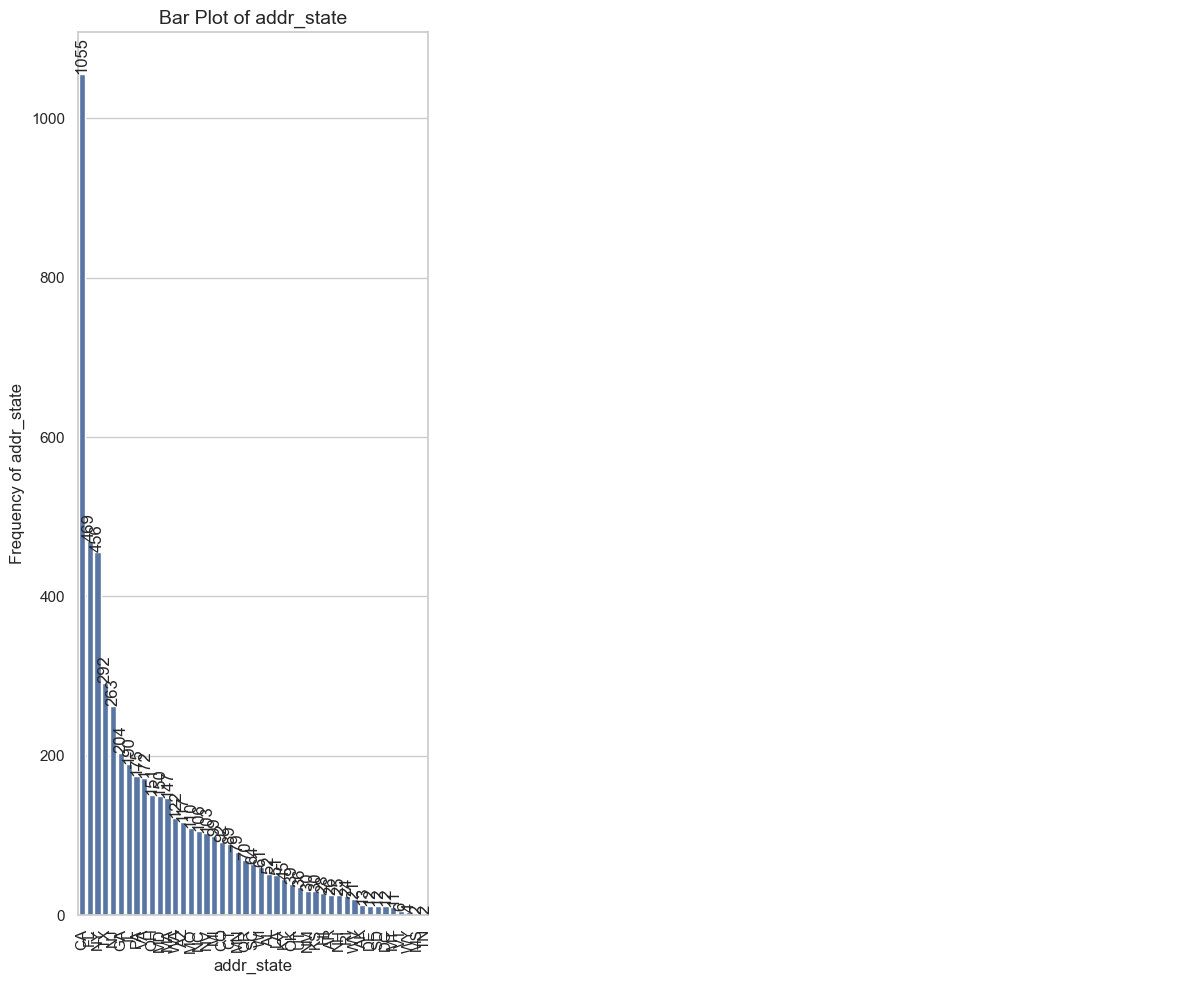

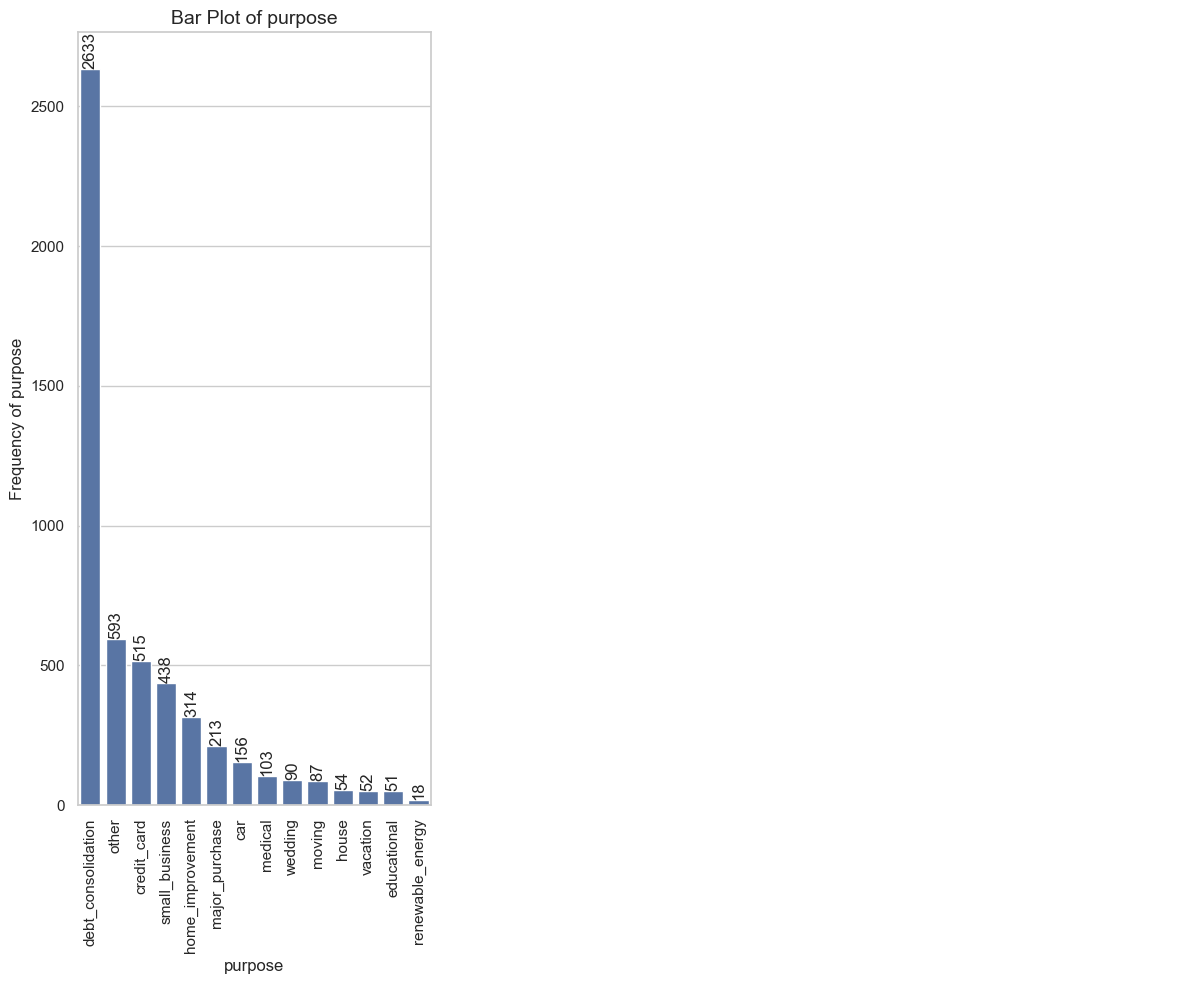

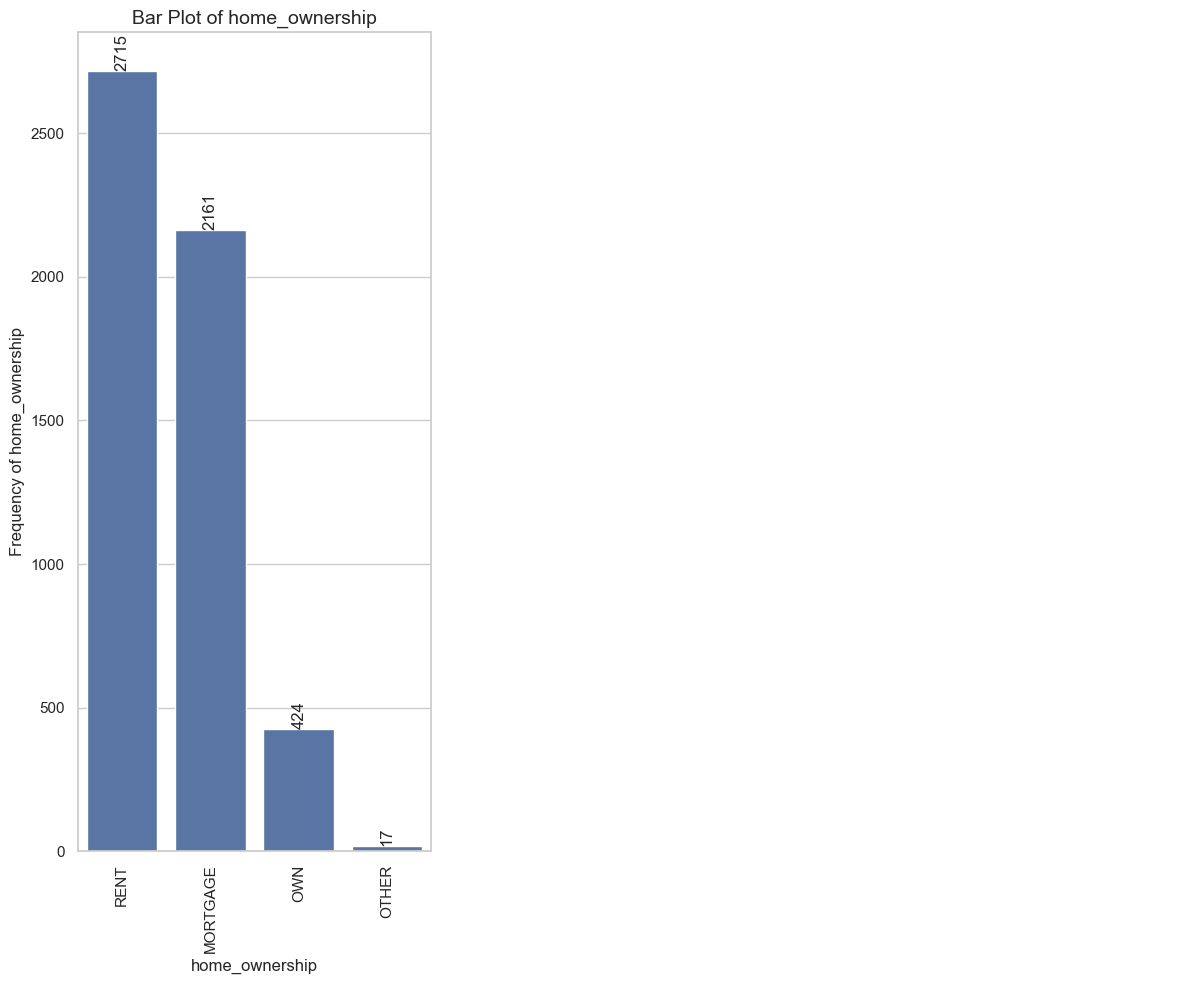

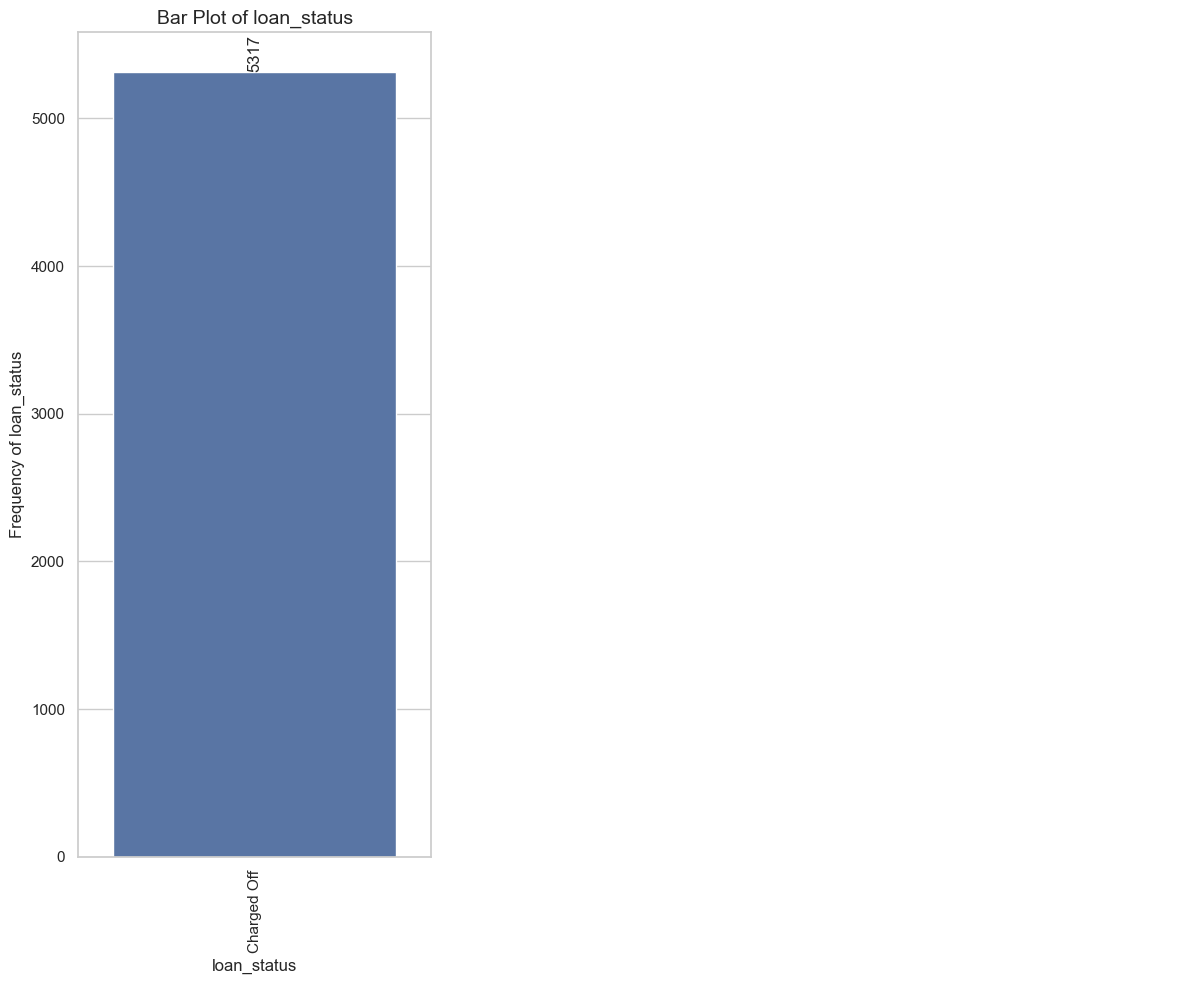

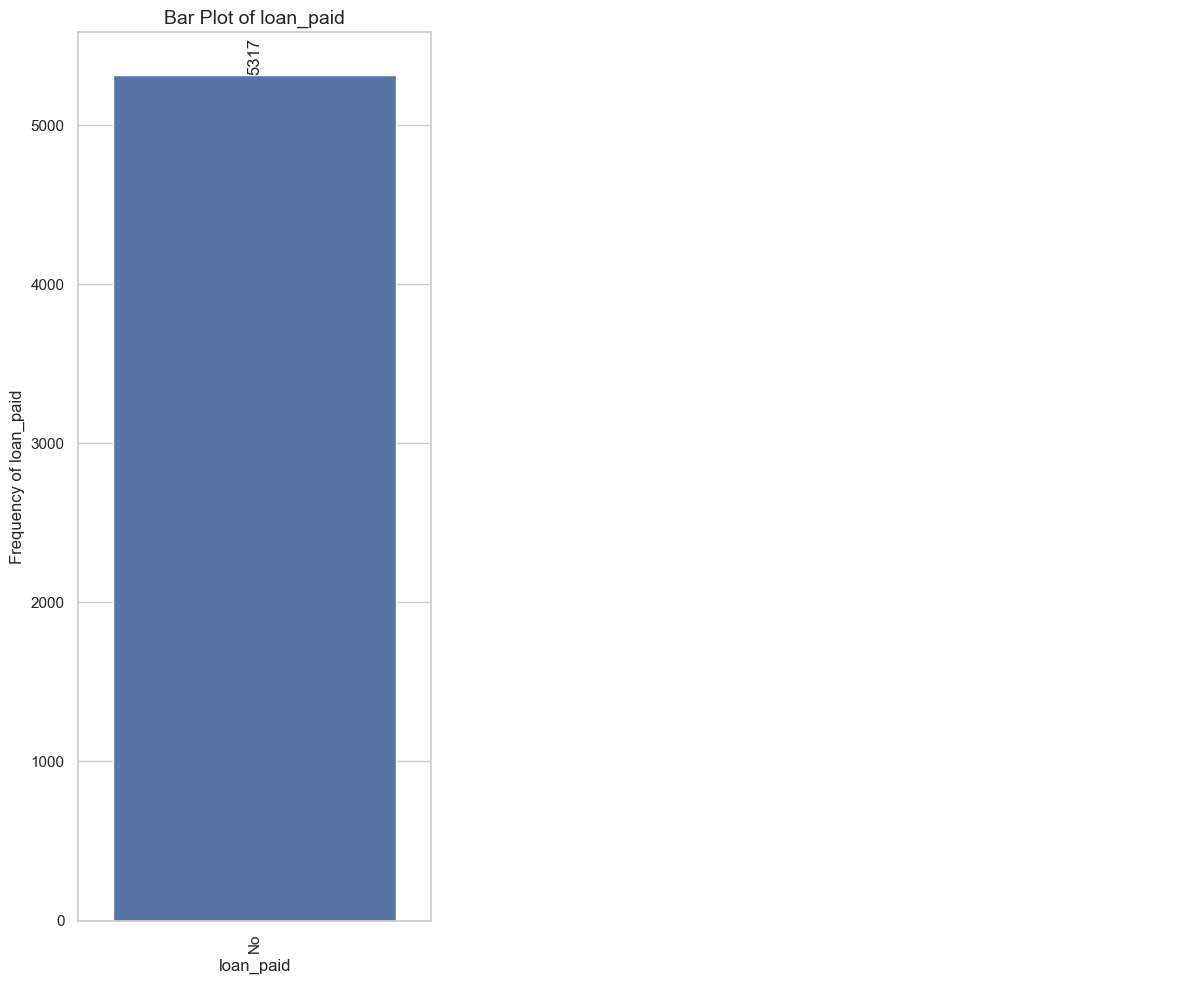

In [521]:
# List of unordered categorical variables to plot
un_cat_vars = ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']

# Loop through the unordered categorical variables and plot them
for un_cat_var in un_cat_vars:
    plot_bar_graph(
        dataframe=loan_df,  # DataFrame to plot
        x_column=[un_cat_var],  # x_column should be the current variable in the loop as a list
        y_column=None,  # y_column is not required for categorical variables
        hue_column=None,  # No hue column specified (can be added if needed)
        title=f'Bar Plot of {un_cat_var}',  # Set the title dynamically
        xlabel=un_cat_var,  # Set xlabel to the current variable name
        ylabel=f'Frequency of {un_cat_var}',  # Set ylabel dynamically
        figsize=(12, 10),  # Set figure size
        x_tick_rotation=90,  # Rotate x-axis labels for better readability
        freq_rotation=90,  # Rotate frequency values on top of bars
        filter_column='loan_status',  # Optional: filter based on loan status
        filter_value='Charged Off'  # Filter the data where loan_status is 'Charged Off'
    )

###### 2.2.2. Quantitative variables

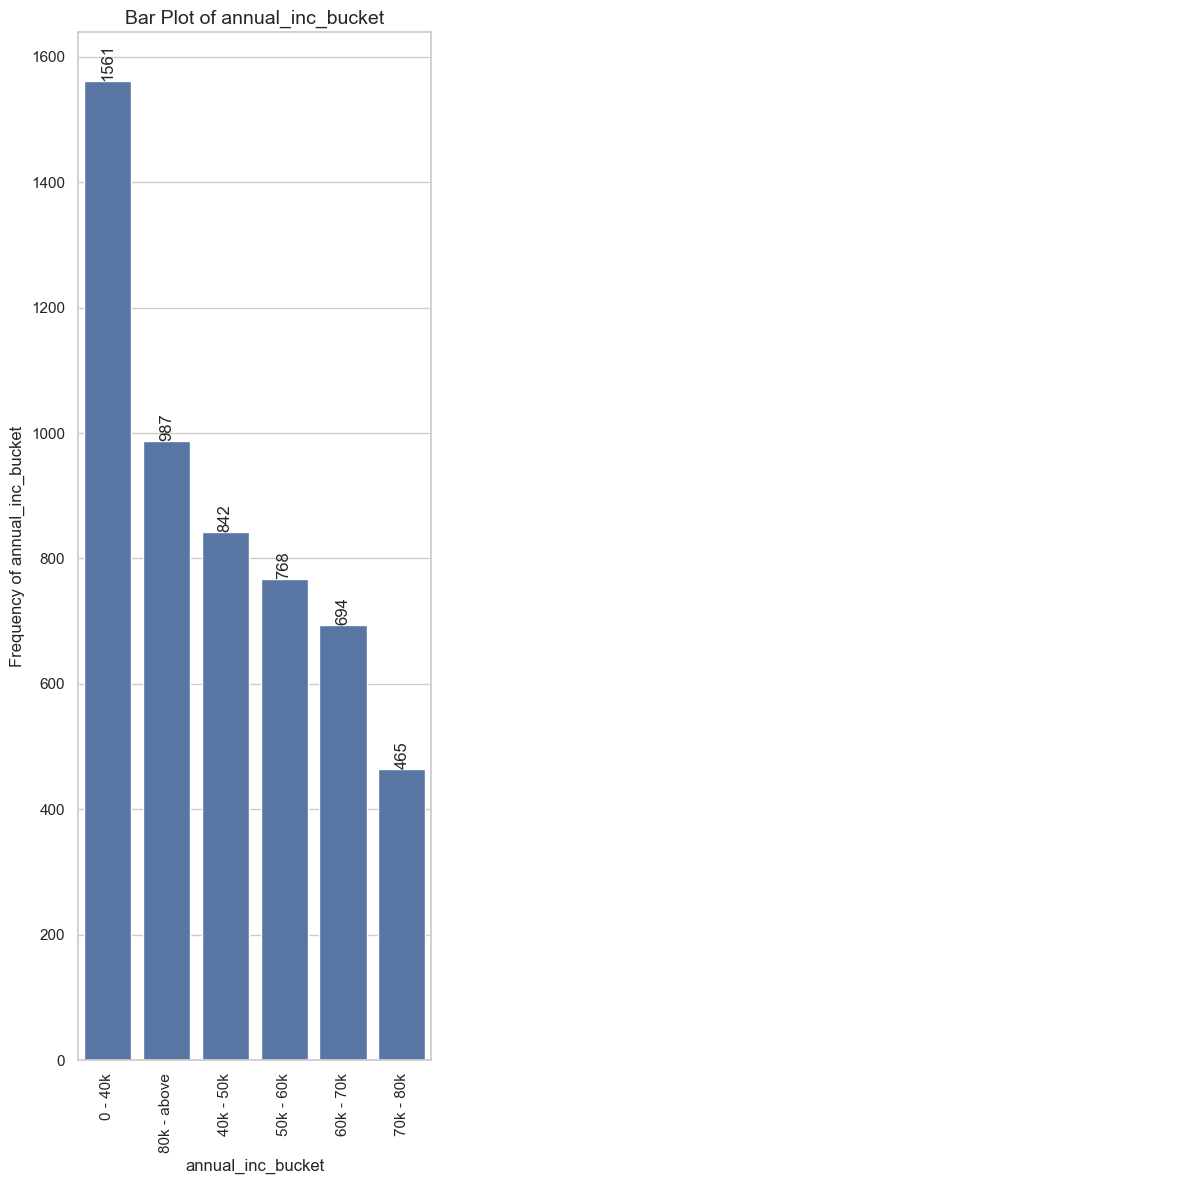

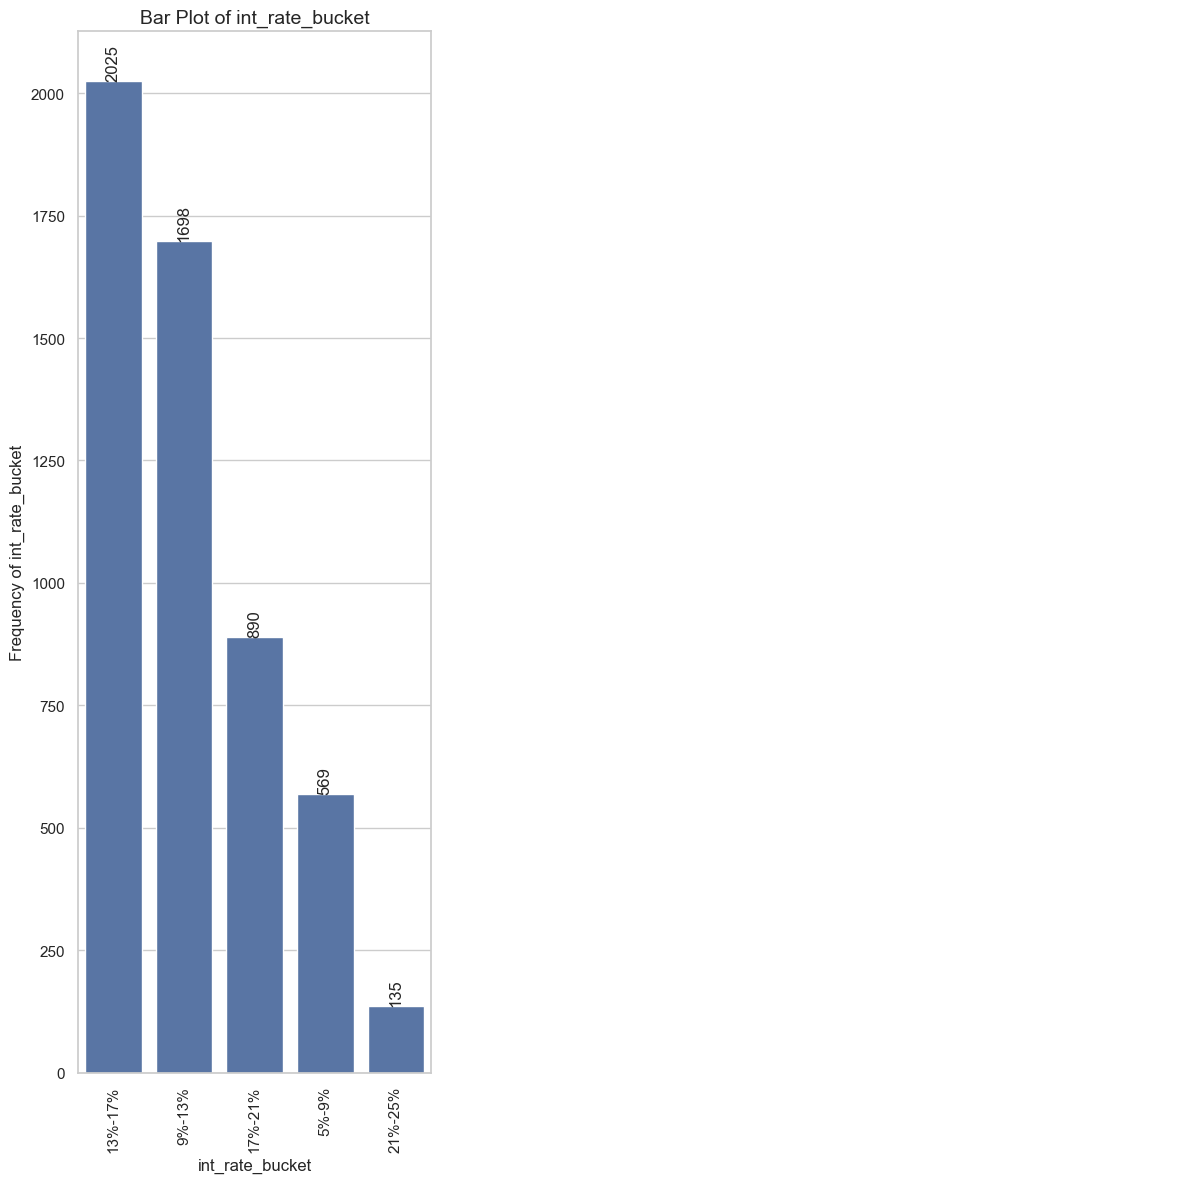

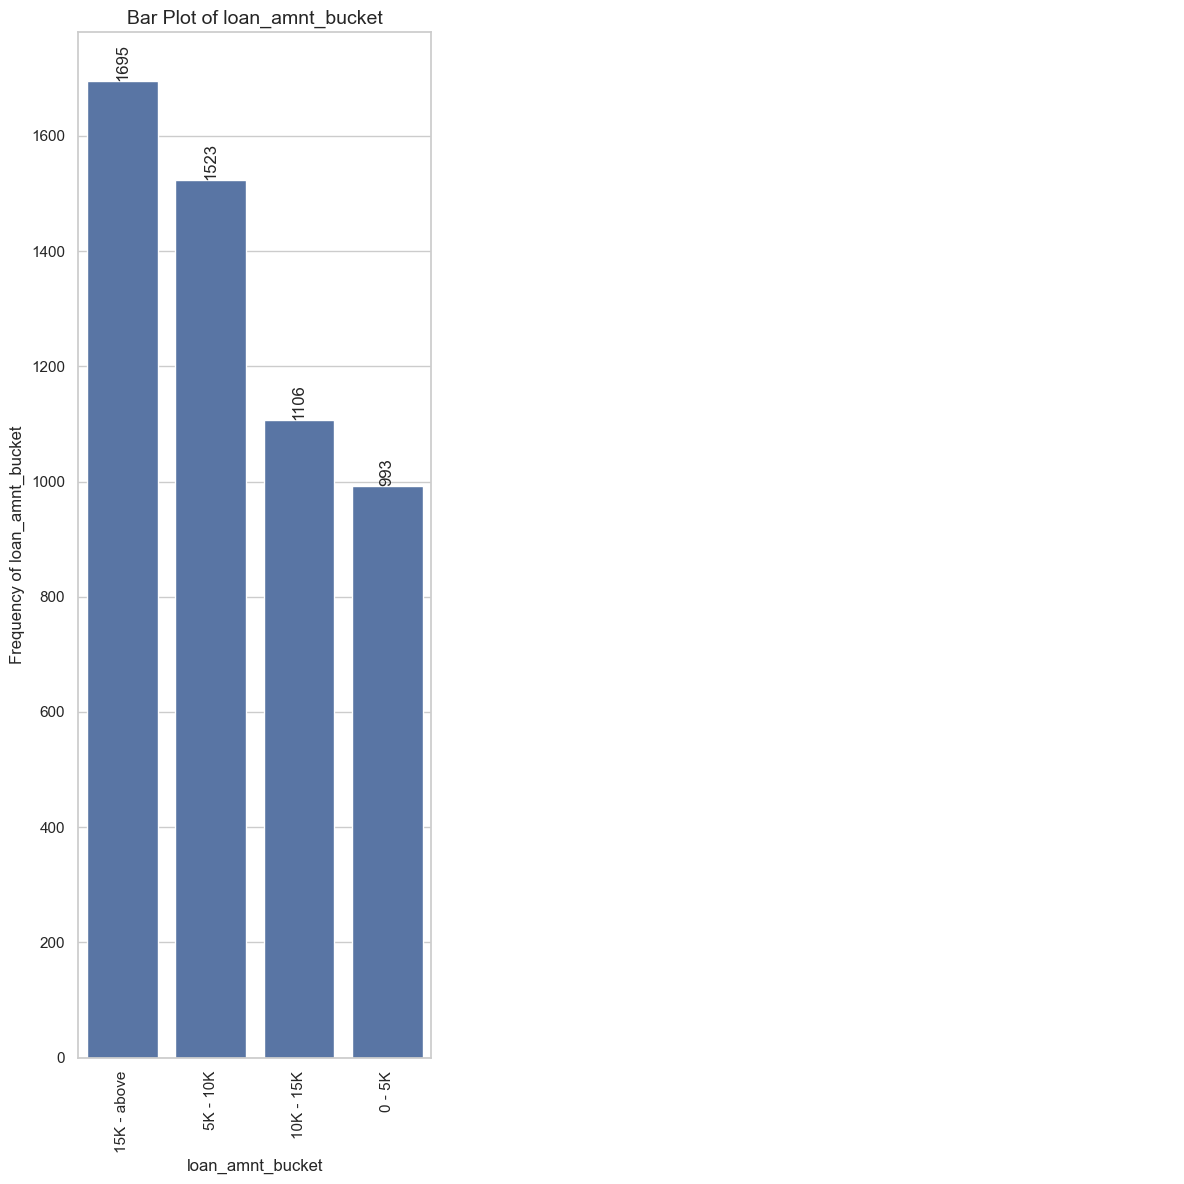

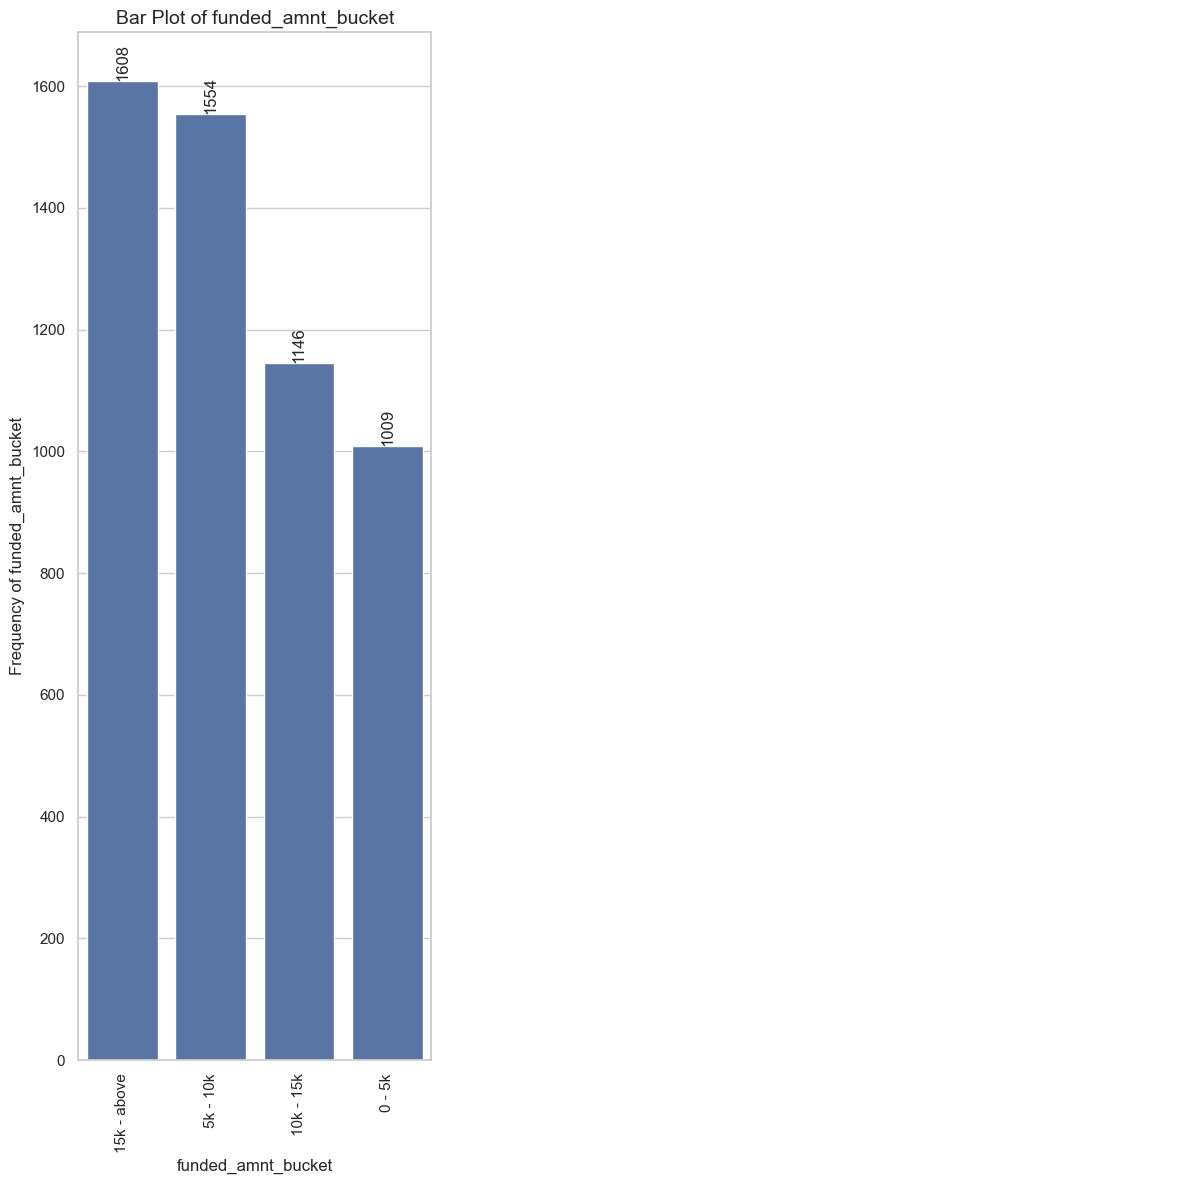

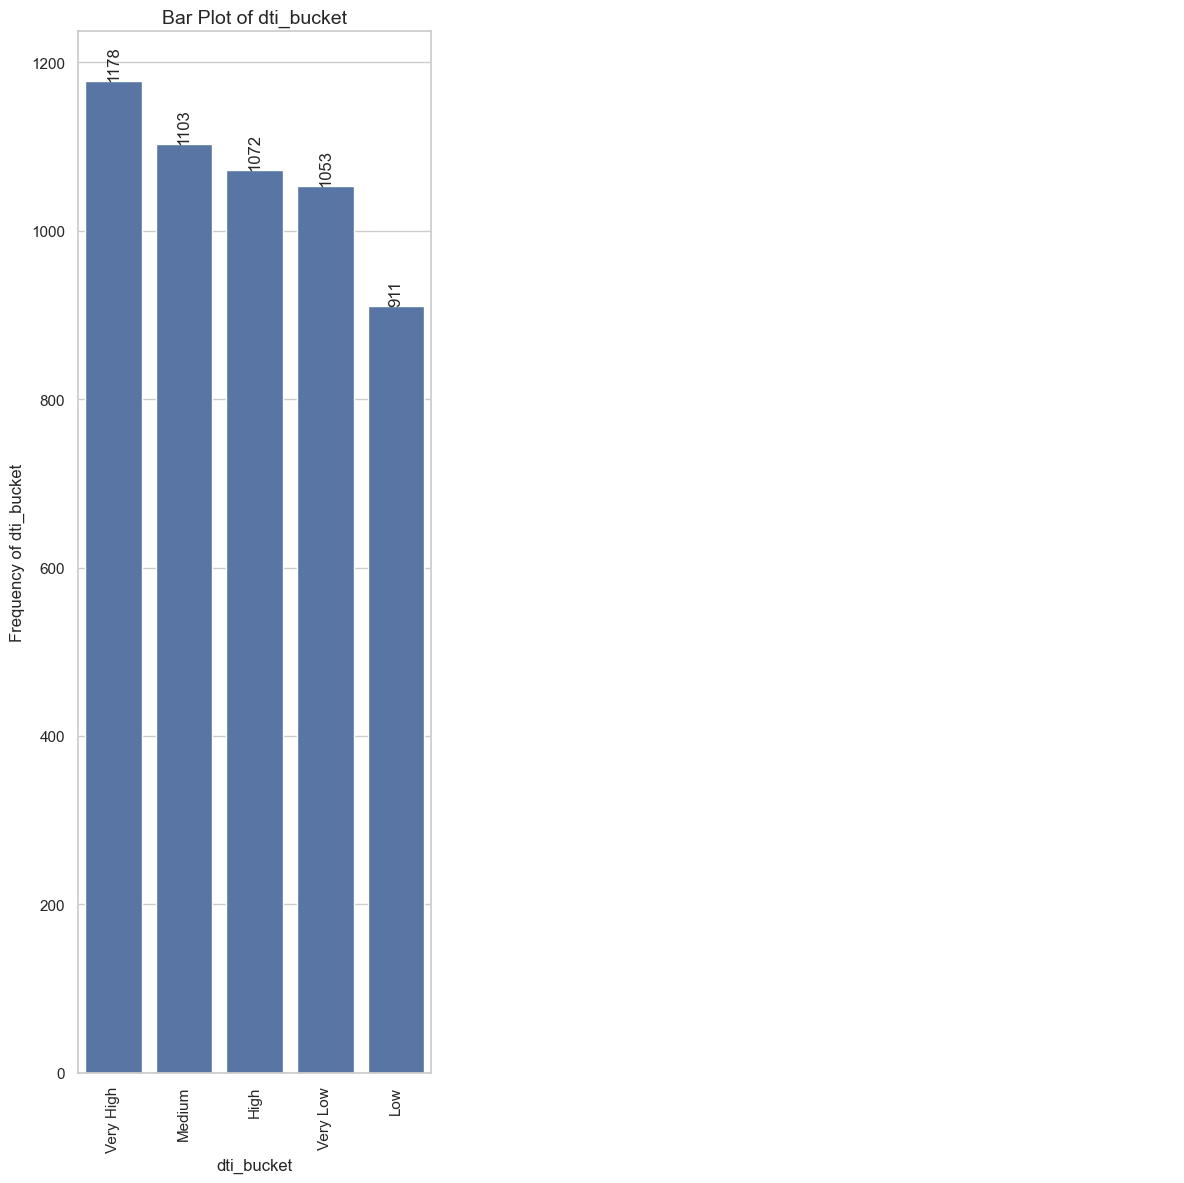

In [530]:

# List of quantitative variables to plot
quant_vars = ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']

# Loop through the quantitative variables and plot them
for quant_var in quant_vars:
    plot_bar_graph(
        dataframe=loan_df,  # DataFrame to plot
        x_column=[quant_var],  # x_column should be the current quantitative variable as a list
        y_column=None,  # y_column is not necessary, as the frequency count will be done within the function
        hue_column=None,  # No hue column specified
        title=f'Bar Plot of {quant_var}',  # Set the title dynamically
        xlabel=quant_var,  # Set xlabel to the current quantitative variable name
        ylabel=f'Frequency of {quant_var}',  # Set ylabel dynamically
        figsize=(12, 12),  # Set figure size
        x_tick_rotation=90,  # Rotate x-axis labels for better readability
        freq_rotation=90,  # Rotate frequency values on top of bars
        filter_column='loan_status',  # Optional: filter based on loan status
        filter_value='Charged Off'  # Filter the data where loan_status is 'Charged Off'
    )

In [534]:
df_installement = loan_df[loan_df.loan_paid == 'No']

In [ ]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

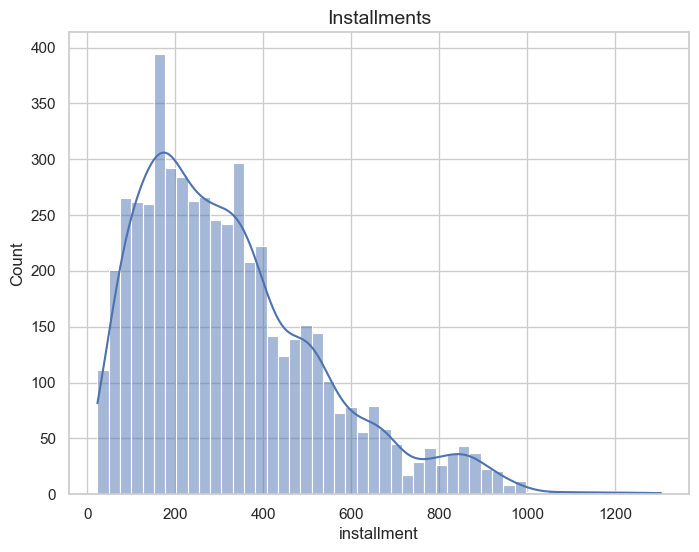

In [543]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df_installement, x='installment', bins=50, kde=True)

plt.title('Installments', fontsize=14)


# Show the plot
plt.show()

###  Univariate Analysis Key Points and observations

#### Ordered Categorical Variables

- **Grade B** exhibited the highest count of "Charged off" loan applicants, with 1,352 individuals, indicating that applicants with this credit grade struggled the most with repaying their loans.

- Loans with a term of **36 months** were the most common among those who defaulted, accounting for 3,006 applications. This suggests that a significant number of defaulters opted for shorter-term loans.

- A large number of loan defaulters, specifically 1,474 individuals, had been employed for over **10 years**. This highlights that a long employment history does not necessarily guarantee the successful repayment of loans.

- The **year 2011** saw the highest volume of "Charged off" loan applications, totaling 3,152, indicating a sharp increase in defaults during that period. This could be attributed to economic challenges or financial stress during that year.

- The majority of "Charged off" loans were originated in the **4th quarter**, with 2,284 applications, predominantly in December. This seasonal peak may be linked to heightened financial strain around the holidays, contributing to defaults.

#### Unordered Categorical Variables

- **California** led with the most "Charged off" loan applicants, with 1,055 defaulters. This suggests the need for the lending company to impose more rigorous eligibility checks or credit assessments in this state due to the higher default rate.

- **Debt consolidation** was the leading purpose for loans among "Charged off" applicants, with 2,633 choosing this option. The lending company should exercise caution when approving loans for debt consolidation, as it was the most common reason for defaults.

- The largest group of loan defaulters, comprising 2,715 individuals, resided in **rented homes**. The lending company should consider the financial stability of applicants in this group, as renters may be more vulnerable to economic downturns.

- A significant portion, **5,317** individuals, were loan defaulters who were unable to repay their loans. The lending company needs to enhance its risk assessment procedures, including stricter credit evaluations and lower loan-to-value ratios, for individuals with a history of loan defaults. Offering financial literacy programs and support services could help improve repayment success.

#### Quantitative Variables

- **1,561** applicants who defaulted on their loans had an annual income of less than **40,000 USD**. The lending company should be more cautious when lending to individuals in this income range, ensuring thorough income verification and assessing repayment capacity more carefully.

- A significant portion of loan defaulters, **2,025** individuals, were in the **13%-17%** interest rate bucket. To reduce default risks, the lending company should explore offering loans at lower interest rates when feasible.

- **1,695** loan participants who charged off had loan amounts of **15,000 USD or more**. The company should carefully evaluate loan applicants seeking larger amounts, ensuring they have a strong credit history and the financial ability to handle such loans.

- **1,608** loan defaulters received funded amounts of **15,000 USD or more**. The lending company should ensure that funded amounts are in line with the borrower's financial capacity, conducting more comprehensive credit assessments for larger loans.

- Among the loan defaulters, **1,178** individuals had exceptionally high **debt-to-income ratios**. The lending company should impose strict debt-to-income ratio limits to avoid lending to borrowers who have unsustainable levels of debt relative to their income.

- **1,178** loan defaulters had monthly installments within the **160-440 USD** range. The company should monitor applicants in this range closely, as they may be at higher risk of defaulting on their loans due to the installment amount.


### 2.3. Bivariate Analysis

In this section, we will examine the following fields as part of the bivariate analysis, specifically focusing on their relationship with the *Loan Status* (`loan_status`) column.

#### 1. Categorical Variables
##### 1.1. Ordered Categorical Data
- *Grade* (`grade`)
- *Sub-grade* (`sub_grade`)
- *Loan Term* (36 / 60 months) (`term`)
- *Employment Length* (`emp_length`)
- *Issue Year* (`issue_y`)
- *Issue Month* (`issue_m`)
- *Issue Quarter* (`issue_q`)

##### 1.2. Unordered Categorical Data
- *Loan Purpose* (`purpose`)
- *Home Ownership Status* (`home_ownership`)
- *Verification Status* (`verification_status`)
- *Address State* (`addr_state`)

#### 2. Quantitative Variables
- *Interest Rate Bucket* (`int_rate_bucket`)
- *Debt-to-Income Ratio Bucket* (`dti_bucket`)
- *Annual Income Bucket* (`annual_inc_bucket`)
- *Funded Amount Bucket* (`funded_amnt_bucket`)
- *Loan Amount Bucket* (`loan_amnt_bucket`)
t** (`loan_amnt_bucket`)


In [584]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()

In [571]:
###### 2.3.1. Bivariate Analysis of Ordered Categorical Variables

In [600]:
loan_df.columns

Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'installment', 'int_rate',
       'issue_d', 'last_pymnt_amnt', 'loan_amnt', 'loan_status',
       'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'term',
       'verification_status', 'issue_m', 'issue_y', 'issue_q', 'loan_paid',
       'loan_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket',
       'funded_amnt_bucket', 'dti_bucket'],
      dtype='object')

In [606]:
loan_df.grade.value_counts()

grade
B    10928
A     9545
C     7322
D     4740
E     2421
F      876
G      262
Name: count, dtype: int64

In [604]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     30777
Charged Off     5317
Name: count, dtype: int64

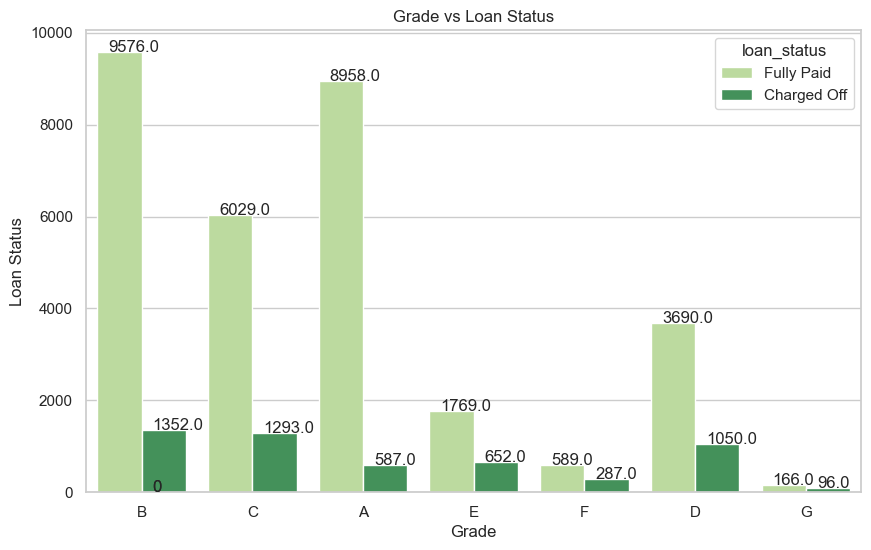

In [610]:
countplot_graph({
    'data': loan_df,
    'x': 'grade',
    'figsize': (10, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'YlGn'
})

###### The majority of "Charged Off" loans come from loan applicants in Grades B, C, and D.

###### 2.3.1.1.2.  Analysis of Sub Grade vs. Loan Status

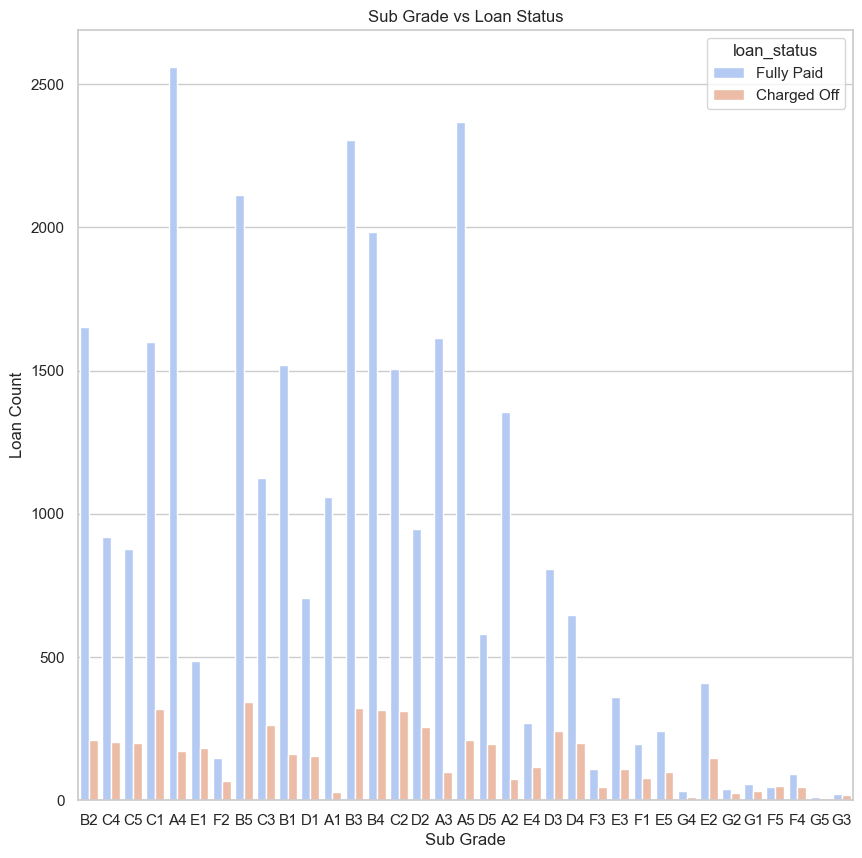

In [617]:
countplot_graph({
    'data': loan_df,
    'x': 'sub_grade',
    'figsize': (10, 10),
    'hue': 'loan_status',
    'xlabel': 'Sub Grade',
    'ylabel': 'Loan Count',
    'title': 'Sub Grade vs Loan Status',
    'palette': 'coolwarm'
}, annot = False)

######  Sub Grades B3, B4, and B5 Loan Applicants are likely to Charge off

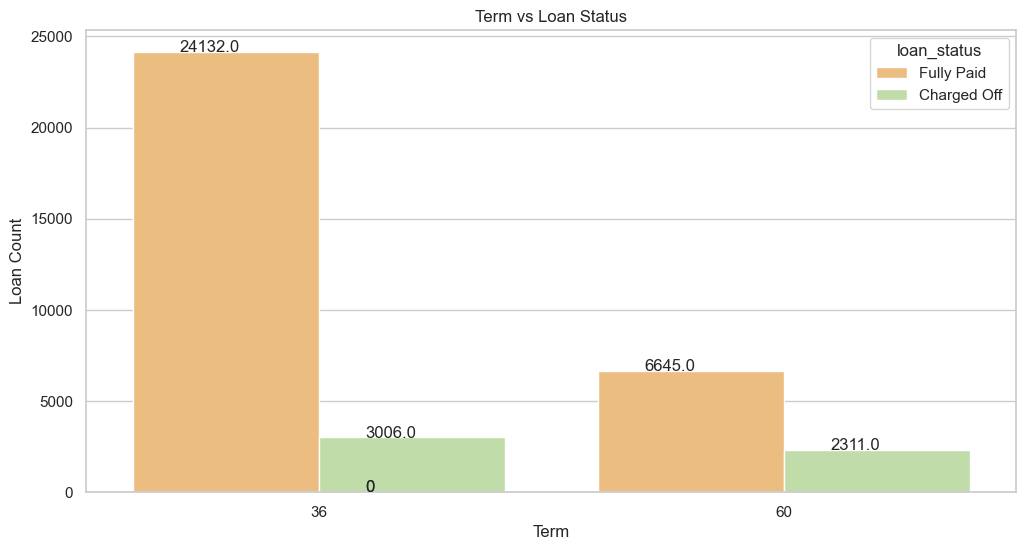

In [623]:
countplot_graph({
    'data': loan_df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    'palette': 'Spectral'
})

######  36 Term period applicants  are having highest Charge Off
###### Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months

###### 2.3.1.1.4. Employment Length vs. Loan Status

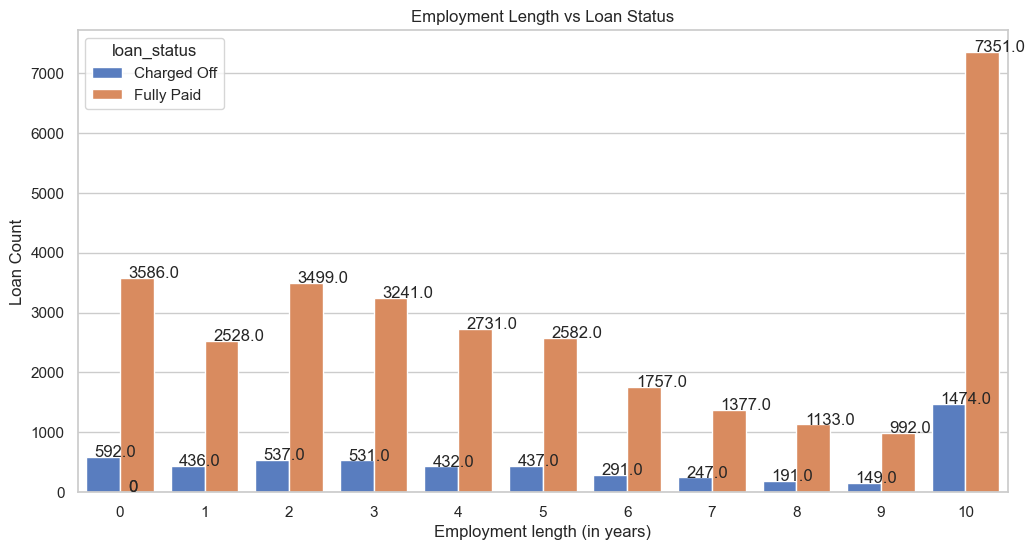

In [638]:
countplot_graph({
    'data': loan_df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "muted"
})

###### The majority of loan applicants have 10 or more years of experience, and they are also the group most likely to default on their loans

###### 3.3.1.1.5. Loan Year vs. Loan Status

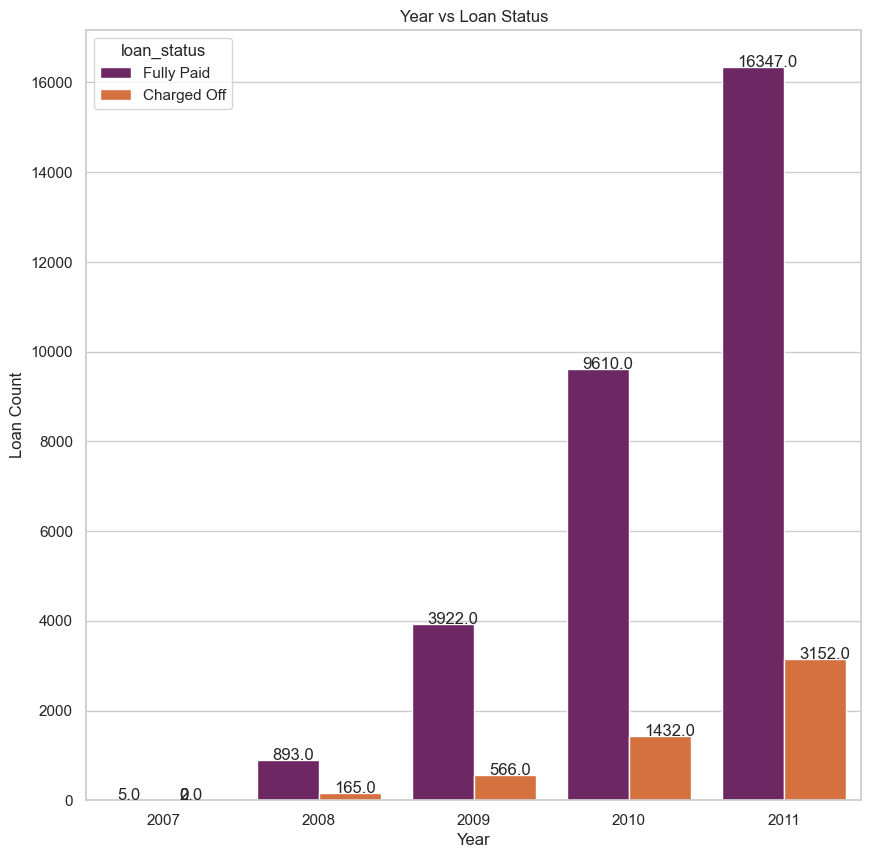

In [646]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_y',
    'figsize': (10, 10),
    'hue': 'loan_status',
    'xlabel': 'Year',
    'ylabel': 'Loan Count',
    'title': 'Year vs Loan Status',
    'palette': "inferno"
})

###### The number of loan applicants has consistently increased from 2007 to 2011, indicating a positive trend for the years ahead.

##### 3.3.1.1.6. Loan Month vs. Loan Status

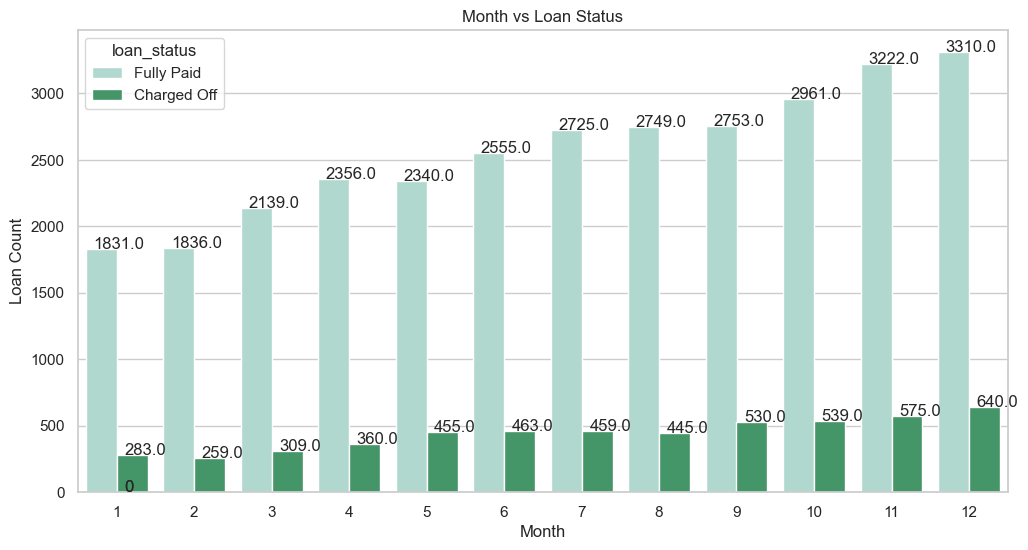

In [655]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_m',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Month',
    'ylabel': 'Loan Count',
    'title': 'Month vs Loan Status',
    'palette': "BuGn"
})

###### Seems like December is the most preferred month where loans are applied most . Holiday season could be the reason for this 

##### 2.3.1.1.7. Loan Quarter vs. Loan Status

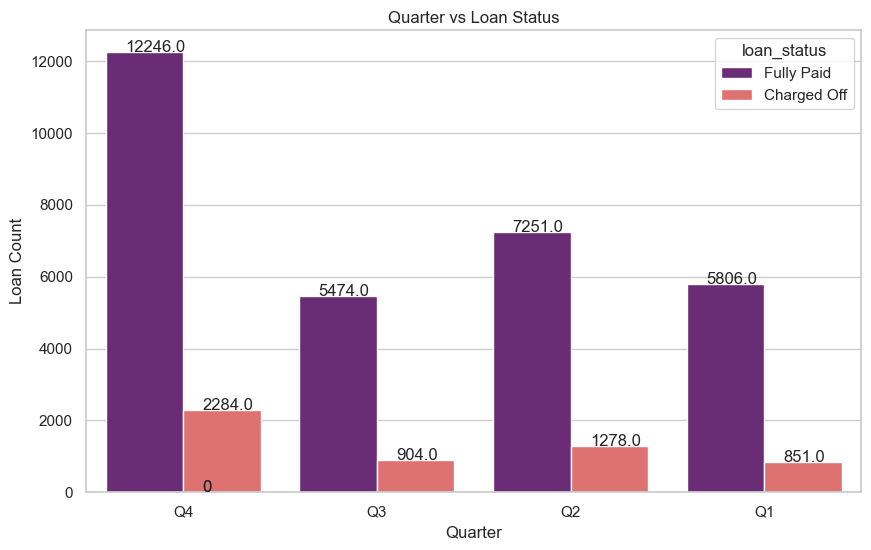

In [666]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_q',
    'figsize': (10, 6),
    'hue': 'loan_status',
    'xlabel': 'Quarter',
    'ylabel': 'Loan Count',
    'title': 'Quarter vs Loan Status',
    'palette': "magma"
})

###### MAJORITY OF THE LOANS WERE TAKEN DURING Q4

#### 2.3.2. Bivariate Analysis of Unordered Categorical Variables

###### 2.3.1.2.1 Purpose vs. Loan Status

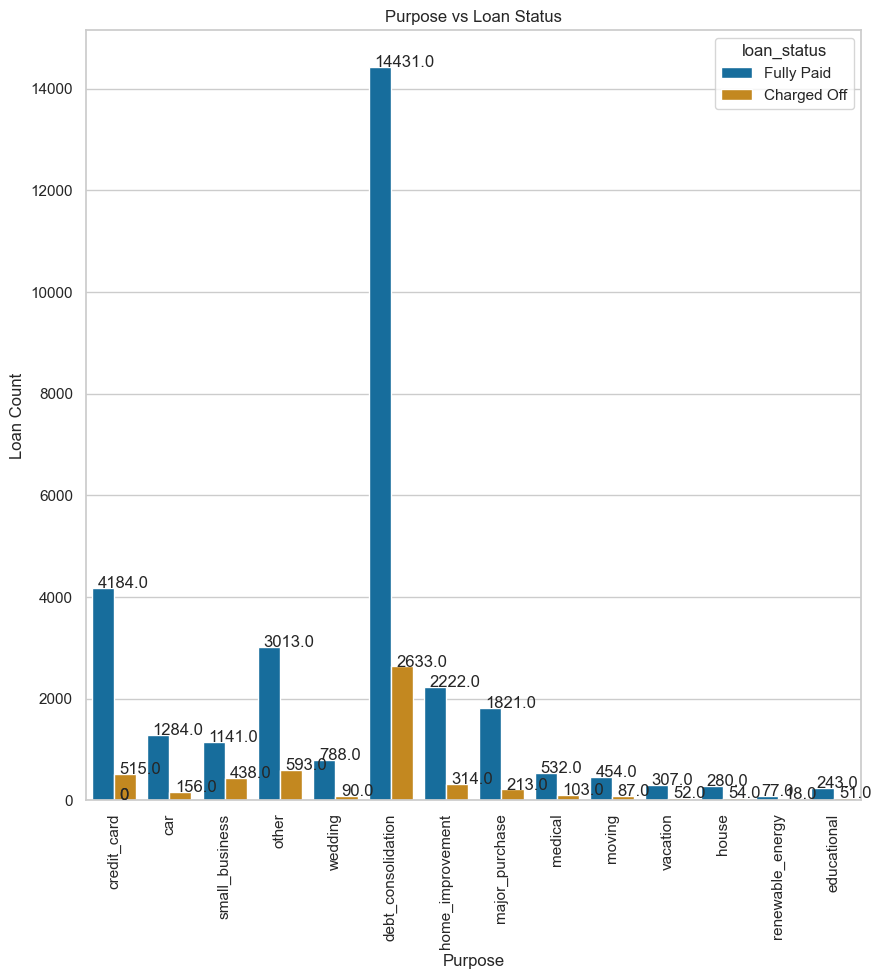

In [679]:
countplot_graph({
    'data': loan_df,
    'x': 'purpose',
    'figsize': (10, 10),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "colorblind",
    'x_tick_rotation': 90
})

######  Majority of loans are issued under 'Debt consolidation' category and people have defaulted the most in the same category.

###### 2.3.1.2.2. Home Ownership vs. Loan Status

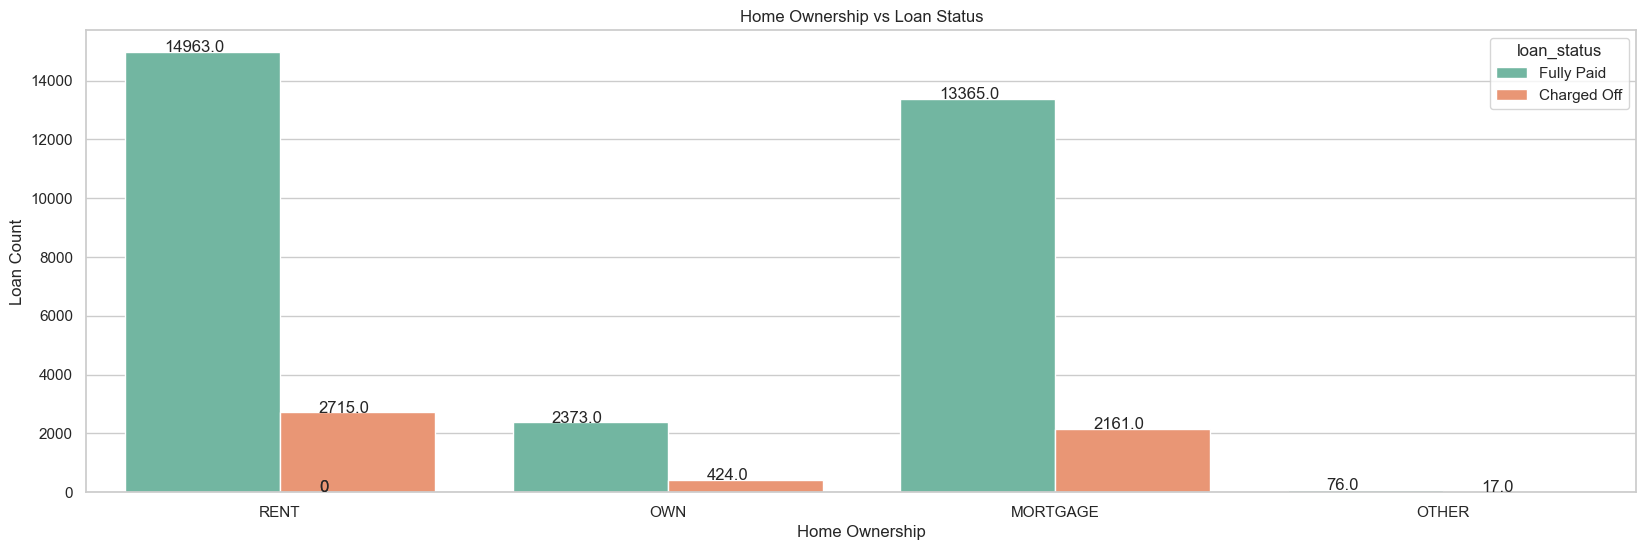

In [688]:
countplot_graph({
    'data': loan_df,
    'x': 'home_ownership',
    'figsize': (20, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "Set2"
})

######  Rented or Mortgaged applicants are more likely to default

###### 2.3.1.2.3. Verification Status vs. Loan Status

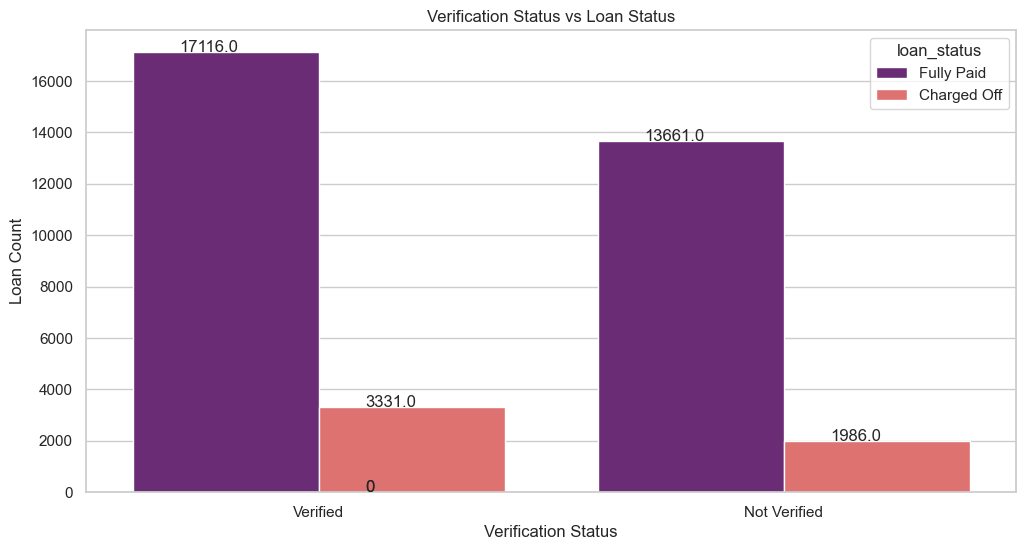

In [697]:
countplot_graph({
    'data': loan_df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "magma"
})

######  Verified loan applicants are defaulting more than the applicants who are not verified

###### 2.3.1.2.4. Address State vs. Loan Status

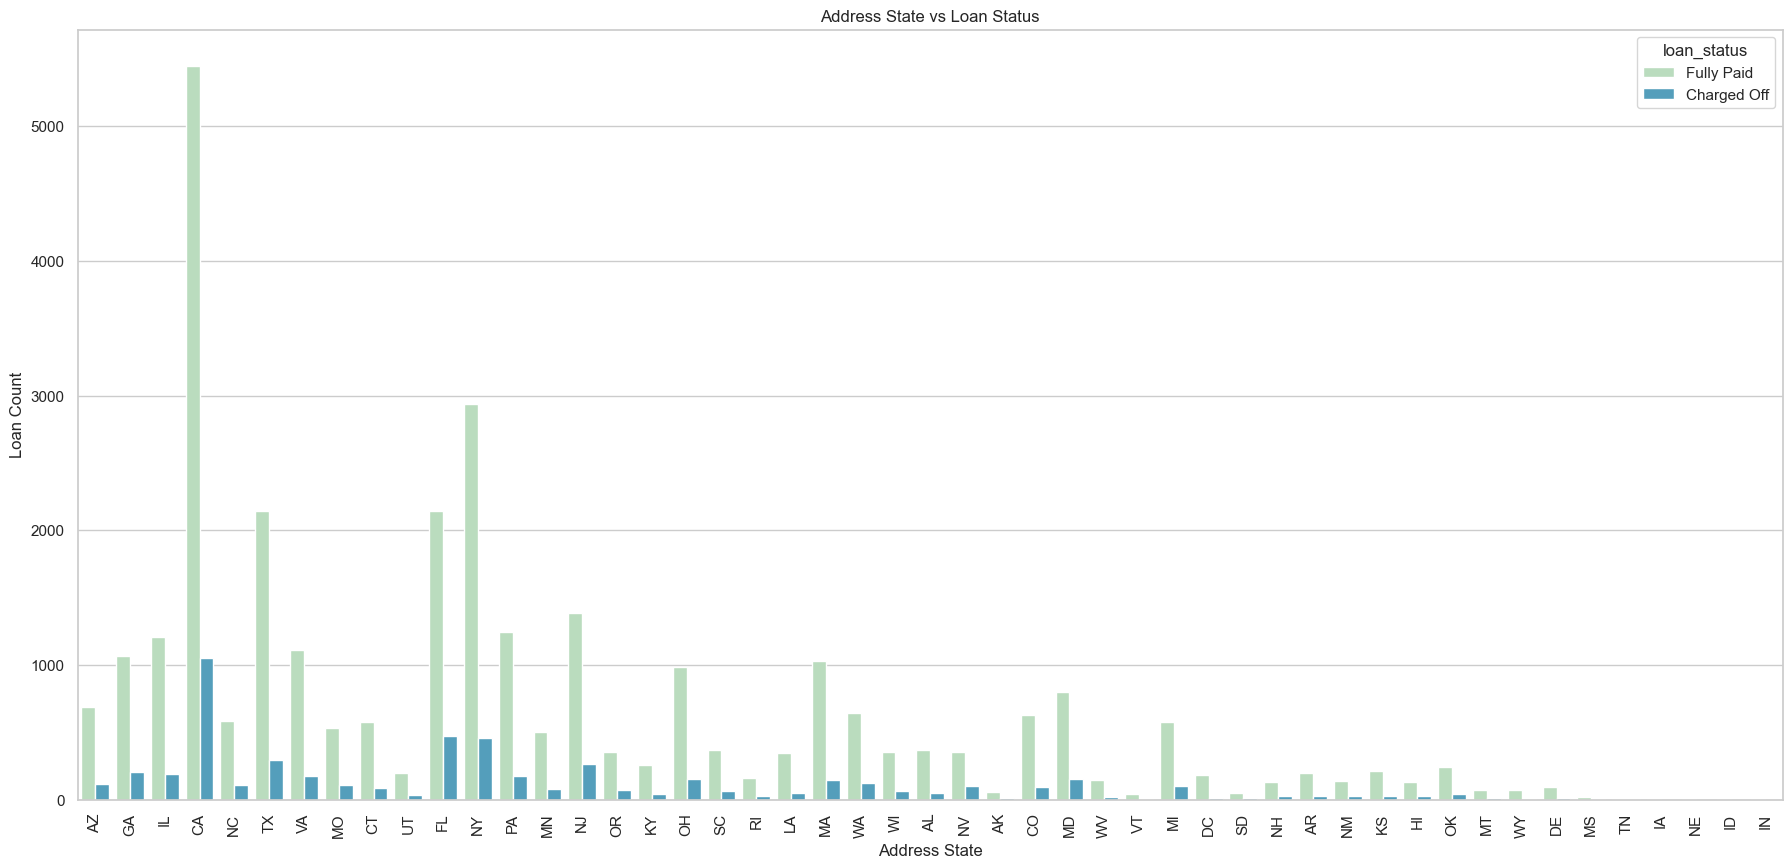

In [715]:
countplot_graph({
    'data': loan_df,
    'x': 'addr_state',
    'figsize': (22, 10),
    'hue': 'loan_status',
    'xlabel': 'Address State',
    'ylabel': 'Loan Count',
    'title': 'Address State vs Loan Status',
    'palette': "GnBu",
    'x_tick_rotation': 90
}, annot=False)

 ###### California (CA), Florida (FL), and New York (NY) loan applicants are most likely to default

#### 2.3.2. Bivariate Analysis of Quantitative Variables

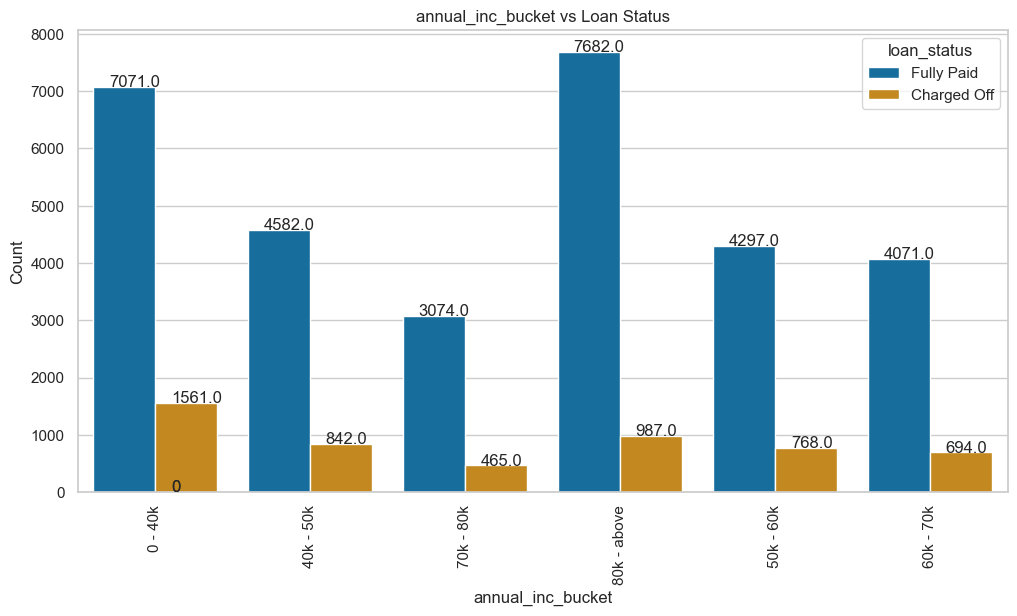

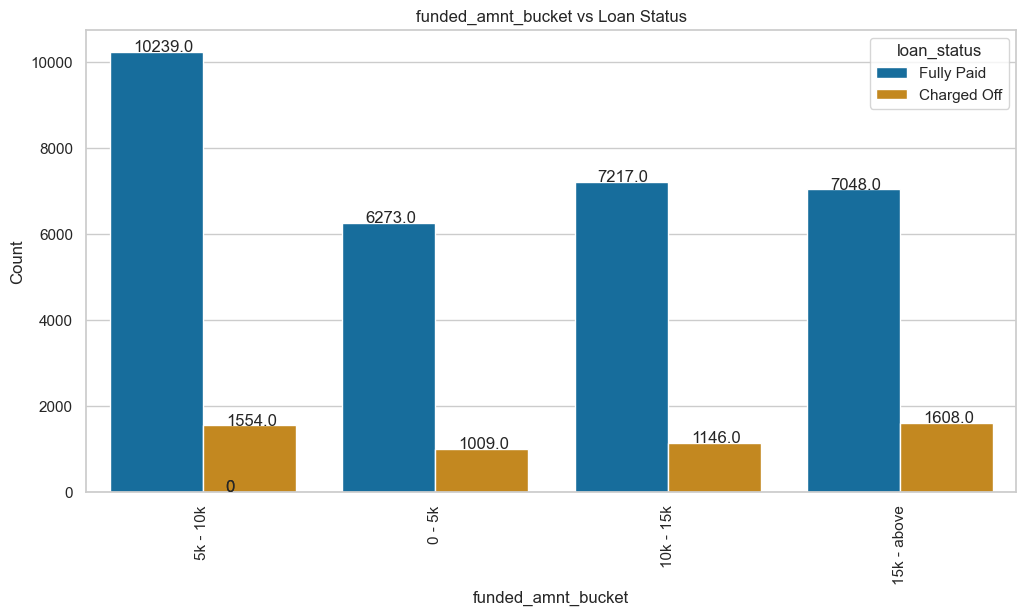

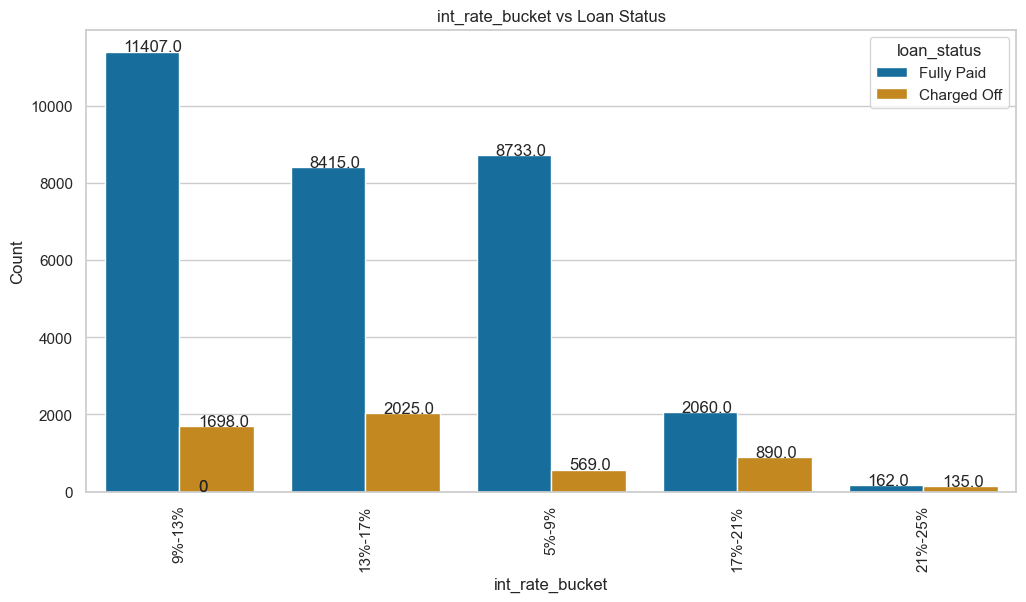

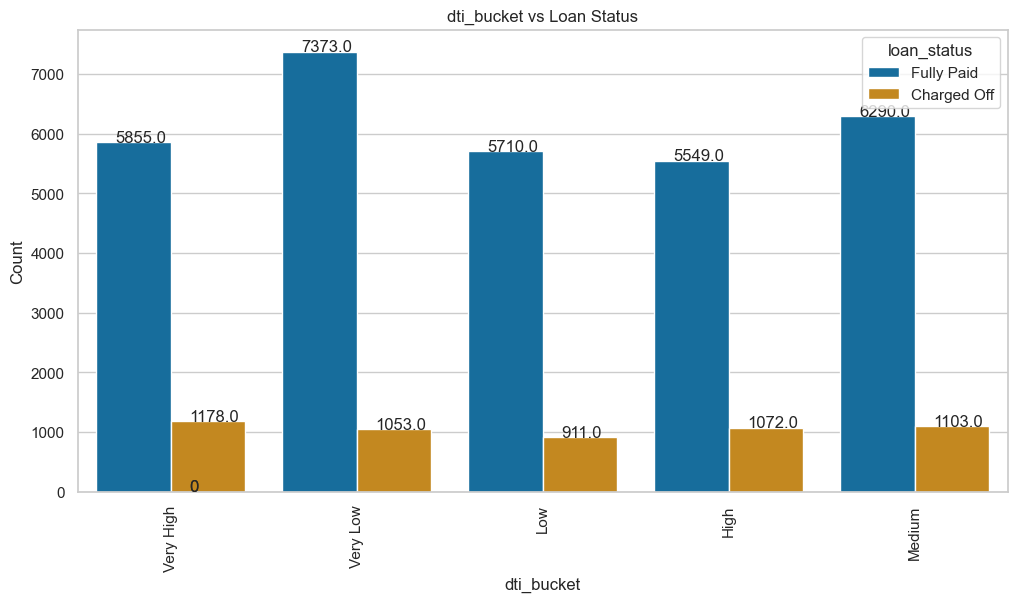

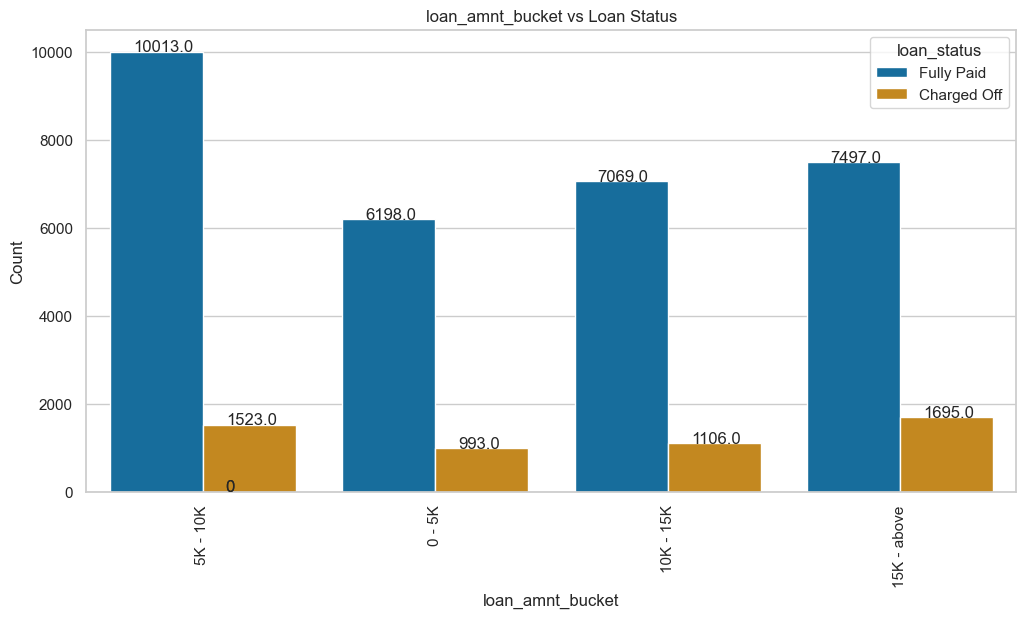

In [725]:
for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': loan_df,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "colorblind",
    'x_tick_rotation': 90
}, annot=True)

##### Insights from Bivariate Analysis of Quantitative Variables

 1. Most loan applicants who defaulted were granted loan amounts of $15,000 or more.
  
 2. A large proportion of applicants who defaulted had very high Debt-to-Income (DTI) ratios.

 3. A notable share of loan applicants who defaulted had interest rates between 13% and 17%.

 4. The majority of loan applicants who charged off reported annual incomes below $40,000.


#### Summary of Bivariate Analysis

- The highest number of "Charged Off" loans come from loan applicants in Grades B, C, and D.

- Loan applicants in Sub Grades B3, B4, and B5 have a higher likelihood of defaulting.

- Loan applicants opting for 60-month loans are more prone to default compared to those taking 36-month loans.

- Most loan applicants have ten or more years of experience, and this group also shows the highest tendency to default.

- The number of loan applicants has steadily grown from 2007 to 2011, suggesting a positive outlook for future years.

- December is the most popular month for loan applications, likely due to the holiday season.

- The fourth quarter (Q4) sees the highest number of loan applications, possibly due to the holiday season.

- Debt consolidation is the category with the most loans issued, and it also sees the highest default rates.

- Loan applicants living in rented or mortgaged homes are more likely to default on their loans.

- Verified loan applicants are defaulting more frequently than those who are not verified.

- Applicants from California (CA), Florida (FL), and New York (NY) are most likely to default on their loans.

- A significant portion of loan applicants who defaulted received loan amounts of $15,000 or more.

- Many loan applicants who charged off had notably high Debt-to-Income (DTI) ratios.

- A considerable number of loan applicants who defaulted had interest rates between 13% and 17%.

- The majority of loan applicants who charged off reported annual incomes below $40,000.


#### Summary of Bivariate Analysis

- The majority of "Charged Off" loans come from applicants in Grades B, C, and D.

- Applicants in Sub Grades B3, B4, and B5 have a higher likelihood of defaulting.

- Applicants who choose a 60-month loan term are more likely to default compared to those who select a 36-month term.

- The largest group of loan applicants have ten or more years of work experience, and this group also has the highest default rate.

- The number of loan applicants has increased consistently from 2007 to 2011, suggesting a positive trend moving forward.

- December is the month with the highest loan application rate, likely due to the holiday season.

- The fourth quarter (Q4) sees the most loan applications, primarily due to the upcoming holiday season.

- Debt consolidation loans are both the most common type of loan issued and the category with the highest default rate.

- Loan applicants who live in rented or mortgaged homes are more likely to default on their loans.

- Verified loan applicants are defaulting more frequently than those who are unverified.

- Loan applicants from California (CA), Florida (FL), and New York (NY) are more likely to default.

- A large proportion of loan applicants who defaulted had loan amounts of $15,000 or higher.

- A significant portion of applicants who defaulted had high Debt-to-Income (DTI) ratios.

- A substantial number of loan applicants who defaulted received loans with interest rates in the range of 13% to 17%.

- The majority of applicants who defaulted reported annual incomes below $40,000.


- *Regional Default Risk*: Loan applicants from states such as California (CA), Florida (FL), and New York (NY) have higher default rates. The company should monitor regional risk trends and consider adjusting its lending strategies or rates based on geographic risk factors.

- *Debt Consolidation Loan Risk*: Since debt consolidation loans account for the highest number of loans issued and defaults, the company should carefully scrutinize applicants seeking debt consolidation loans. Adjusting interest rates or offering financial counseling services could help mitigate this risk.

- *Focus on Subgrades B3, B4, and B5*: Special attention should be given to applicants in Subgrades B3, B4, and B5, as they exhibit a higher likelihood of charging off. Introducing additional risk mitigation strategies or offering lower loan amounts could be beneficial.

- *Debt-to-Income Ratio and Interest Rate Risk*: High Debt-to-Income (DTI) ratios and interest rates between 13% and 17% are strongly associated with loan defaults. The company should consider revising its interest rate policies and ensure that rates are more aligned with the applicant's DTI ratio to reduce the risk of default.

- *Seasonal Loan Application Trends*: December and the fourth quarter (Q4) see the highest volume of loan applications, likely due to the holiday season. The company should anticipate this surge in demand and ensure it has the capacity to process applications efficiently during these peak periods.

- *Loan Verification Process*: Verified applicants have shown a higher default rate compared to unverified applicants. The company should review and improve its verification process to ensure it accurately evaluates the creditworthiness of applicants and take corrective measures where necessary.

- *Risk Evaluation for Grades B, C, and D*: Since loan applicants from Grades B, C, and D are the main contributors to "Charged Off" loans, the company should consider applying more stringent risk assessment and underwriting criteria for applicants in these grades.

- *High Loan Amount Risk*: Applicants seeking loan amounts of $15,000 or more are more likely to default. To mitigate this risk, the company should conduct more rigorous assessments for larger loan requests and consider capping loan amounts for higher-risk applicants.

- *Housing Status and Default Likelihood*: Applicants who live in rented or mortgaged homes tend to have a higher risk of defaulting. This information should be factored into the underwriting process to assess the stability of the applicant’s housing situation and its potential impact on their ability to repay the loan.

- *Loan Term Considerations*: Given that applicants opting for 60-month loan terms tend to default more often, the company should assess the risks associated with longer loan durations and consider limiting maximum terms or adjusting interest rates accordingly.

- *Growth Trend in Loan Applications*: The steady rise in loan applications from 2007 to 2011 reflects a growing market trend. The company can leverage this growth by maintaining a competitive position in the industry while strengthening its risk management practices.

- *Income Level and Default Probability*: Applicants with an annual income of less than $40,000 are more likely to default. The company could offer financial education or set loan amount caps based on income levels to ensure loan affordability for applicants with lower incomes.

- *Experience and Default Risk*: Loan applicants with 10 or more years of experience tend to have a higher likelihood of default. This suggests that experience alone may not be a reliable indicator of creditworthiness, prompting the need for a more holistic credit scoring system that accounts for other risk factors.
s with lower incomes.
```syste


### 3. Correlation Analysis

In [805]:
loan_df.columns

Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'installment', 'int_rate',
       'issue_d', 'last_pymnt_amnt', 'loan_amnt', 'loan_status',
       'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'term',
       'verification_status', 'issue_m', 'issue_y', 'issue_q', 'loan_paid',
       'loan_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket',
       'funded_amnt_bucket', 'dti_bucket'],
      dtype='object')

In [807]:

columns_to_copy = ['installment', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'annual_inc', 
                   'term', 'emp_length', 'int_rate', 'dti','pub_rec_bankruptcies']
# Dropping columns which are irrelevant to analysis
correlation_df = loan_df[columns_to_copy].copy()

In [809]:
correlation_df.columns

Index(['installment', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt',
       'annual_inc', 'term', 'emp_length', 'int_rate', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

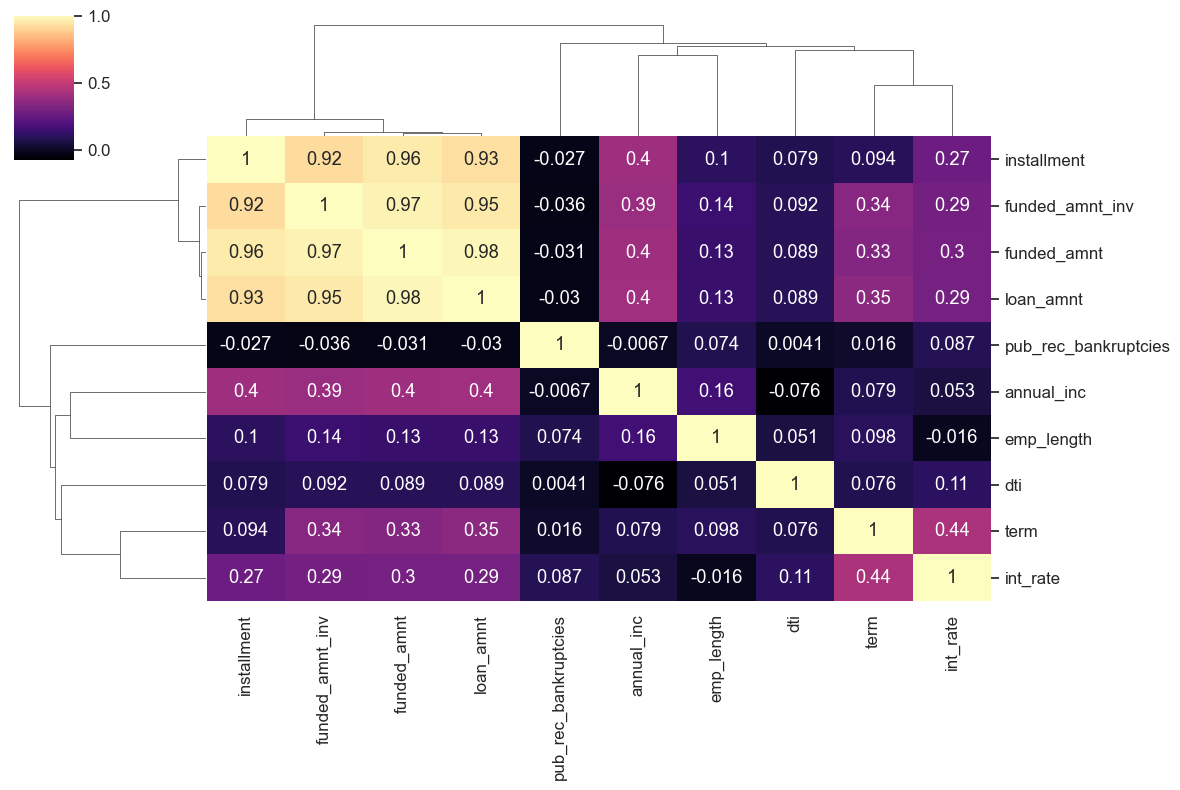

In [817]:
corr_loan_df = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr_loan_df, annot=True, figsize=(12, 8), cmap="magma")
plt.show()

### Inferences from Correlation Metrics

#### Strong Correlation
- There is a significant correlation between `installment` and `funded_amnt`, `loan_amnt`, as well as `funded_amnt_inv`.
- `term` shows a strong relationship with the interest rate.
- `annual_inc` exhibits a notable correlation with `loan_amnt`.

#### Weak Correlation
- `dti` displays a weak correlation with most other fields.
- `emp_length` also shows a weak correlation with several other variables.

#### Negative Correlation
- `pub_rec_bankruptcies` is negatively correlated with nearly all other fields.
- `annual_inc` shows a negative correlation with `dti`.


### 4. Multivariate Analysis

In [861]:
def charged_off_percentage_plot(df, column, stacked=False):
    charged_off_data_df = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data_df['Total'] = charged_off_data_df['Charged Off'] + charged_off_data_df['Fully Paid']
    charged_off_data_df['Charged Off %'] = round((charged_off_data_df['Charged Off'] * 100 / charged_off_data_df['Total']), 2)
    # Remove the last row with sum total
    charged_off_data_df = charged_off_data_df[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage with custom color
    charged_off_plot = charged_off_data_df[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='darkred', lw=2)  # Change the line color here
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off Percent %')

    # Bar plot for Number of Loans with custom colors
    loans_plot = charged_off_data_df.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Custom bar colors
    ax2.set_ylabel('Number of Loans')
    
    plt.show()


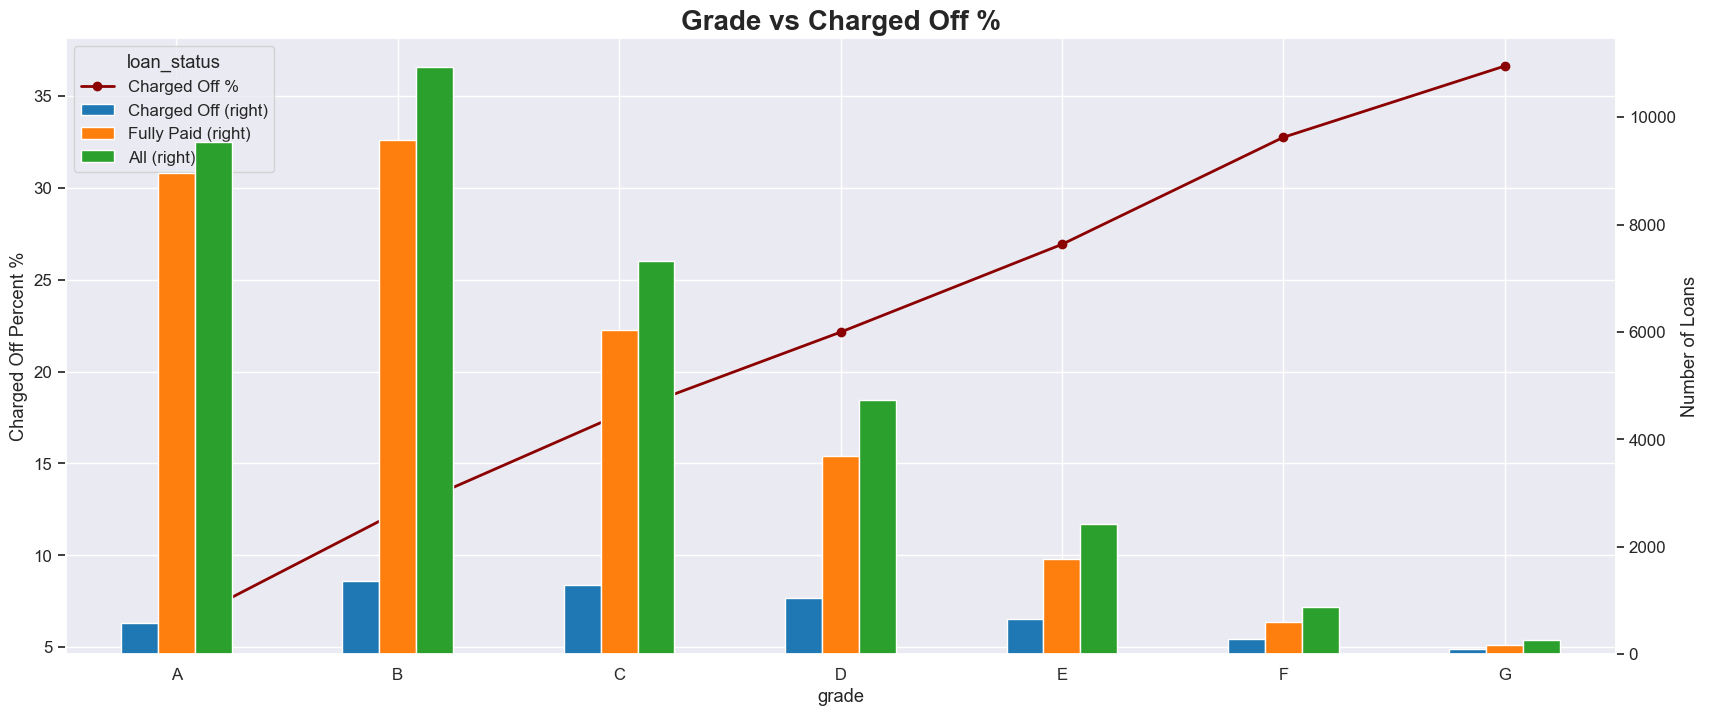

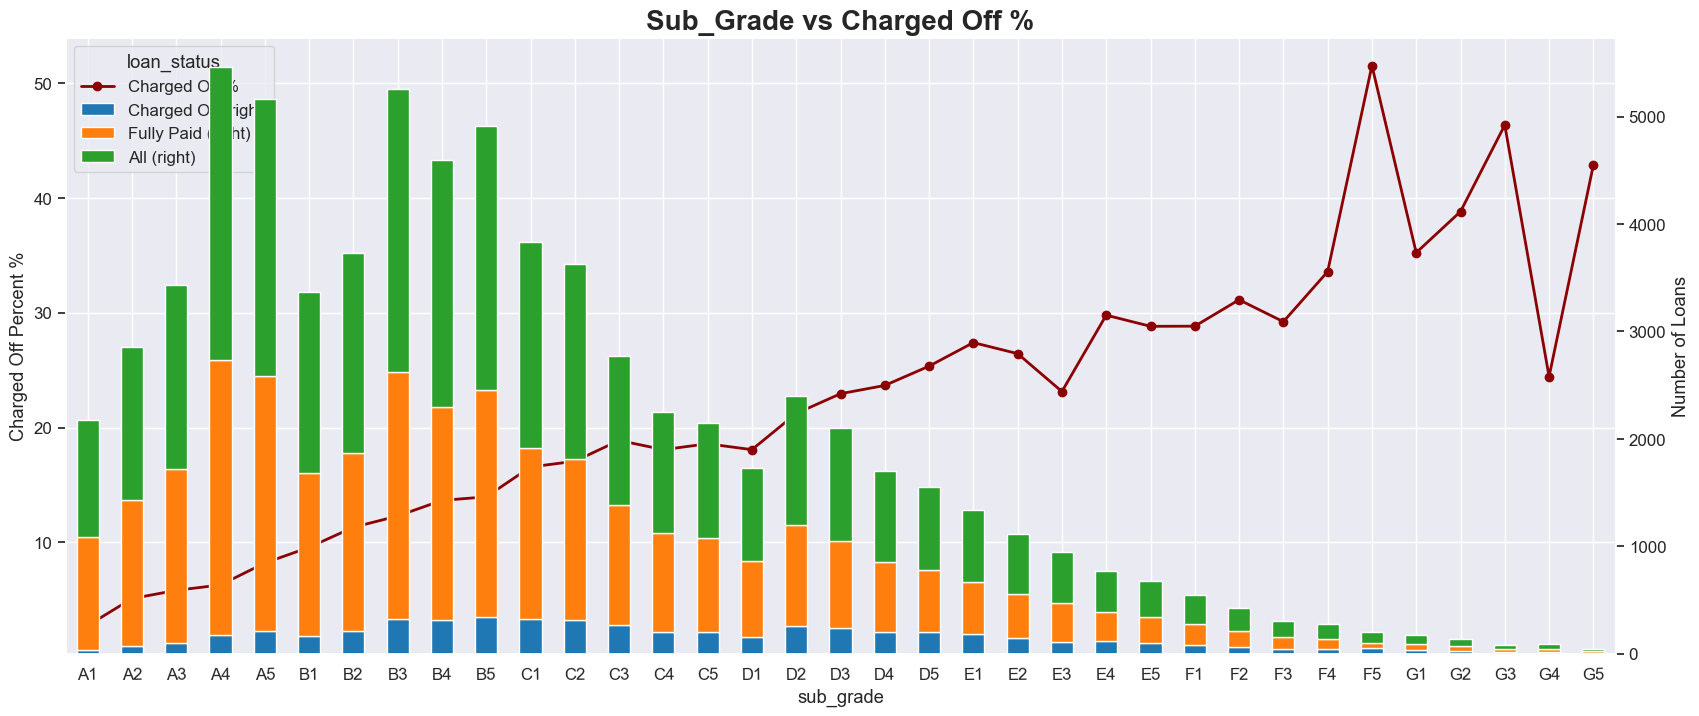

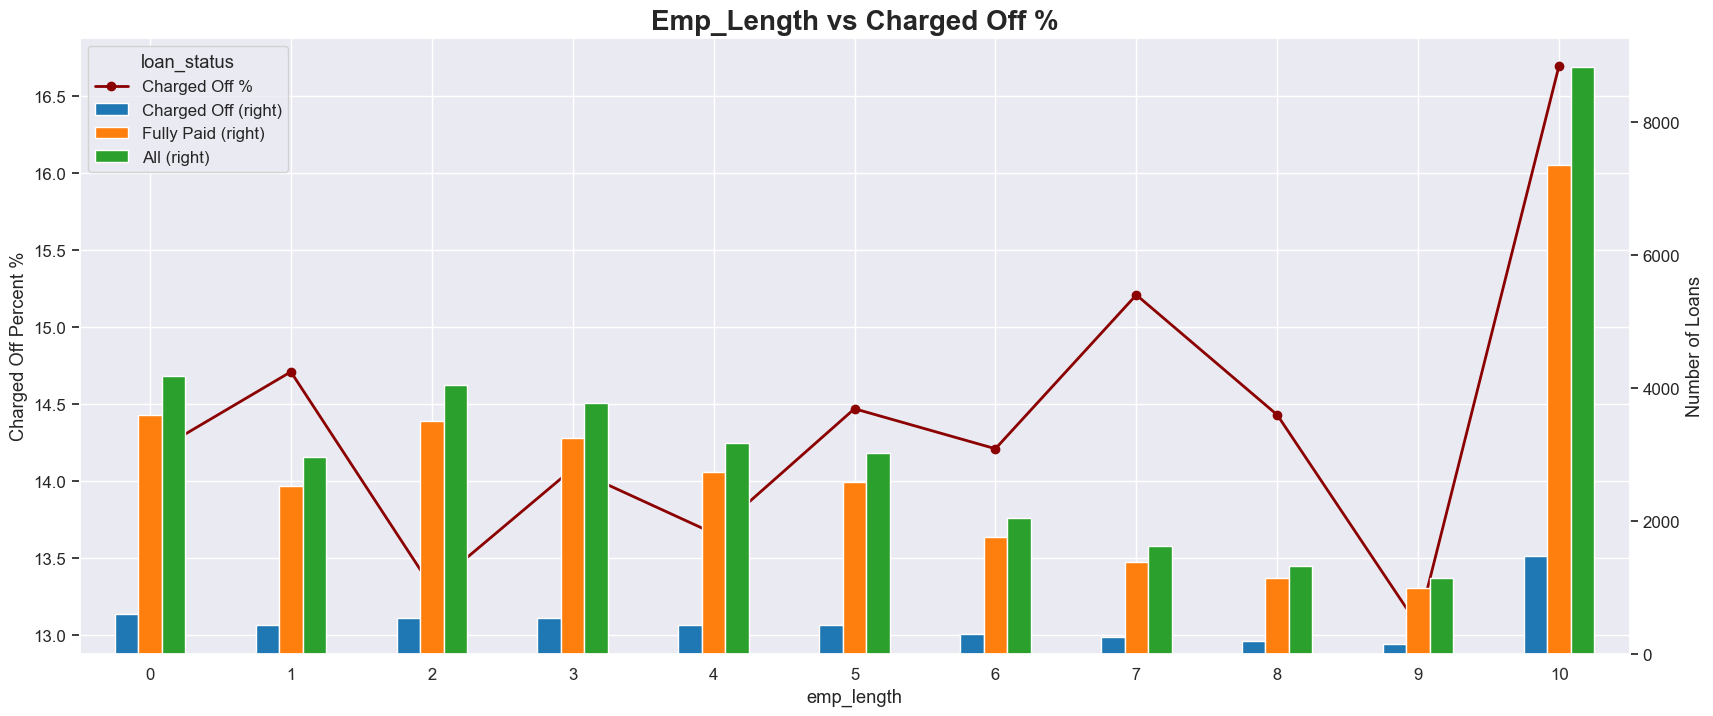

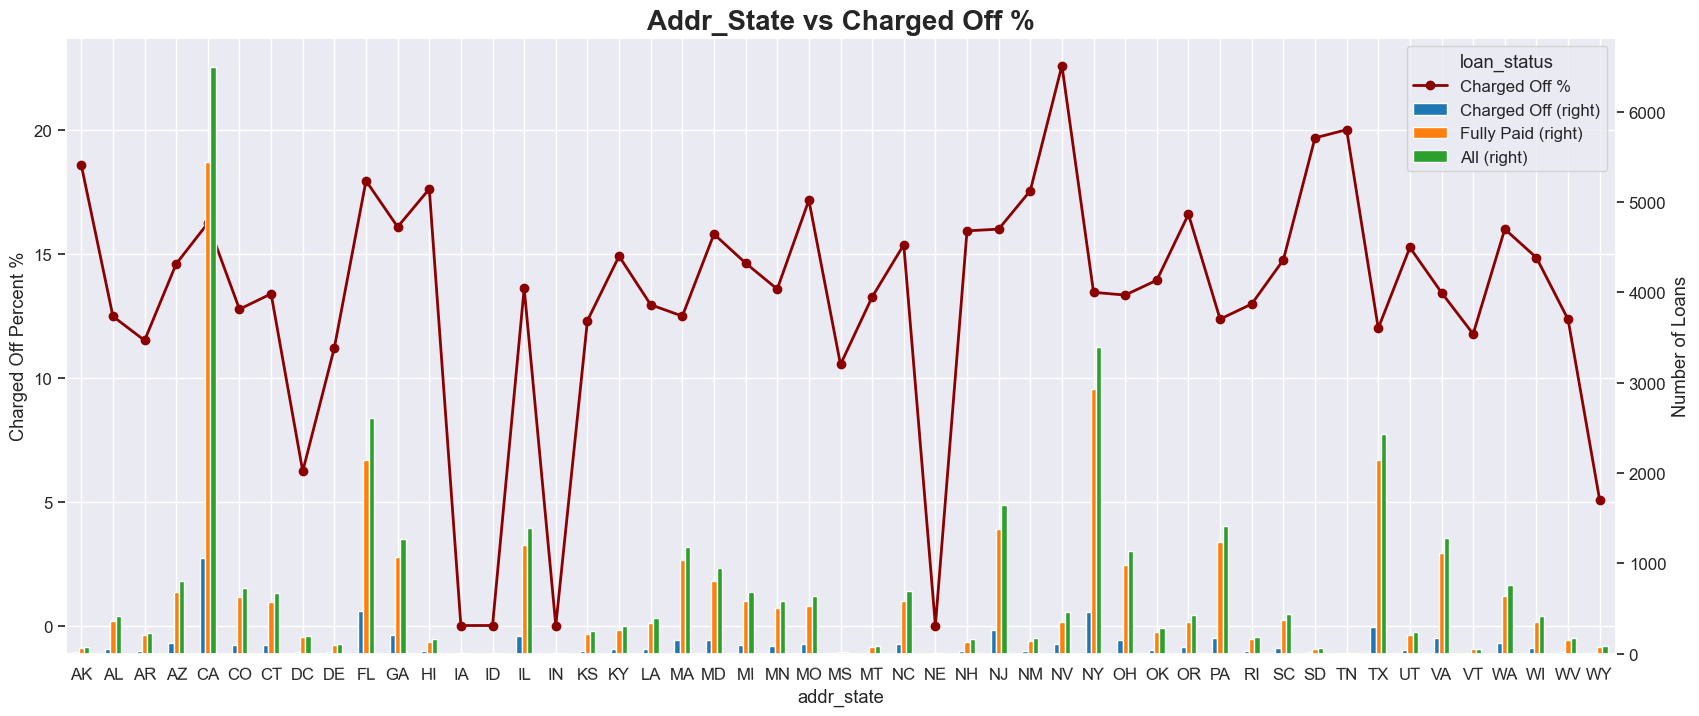

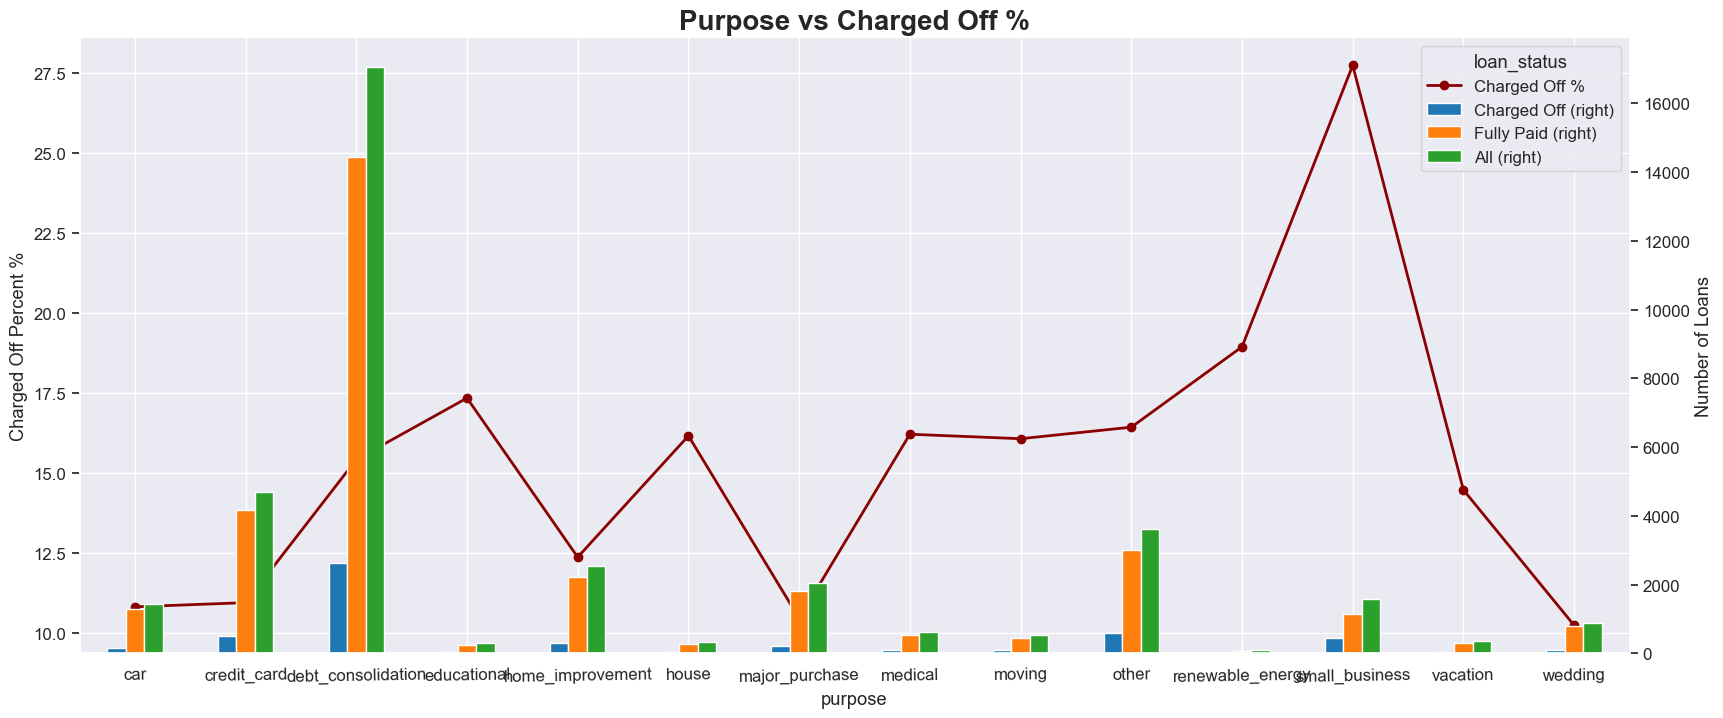

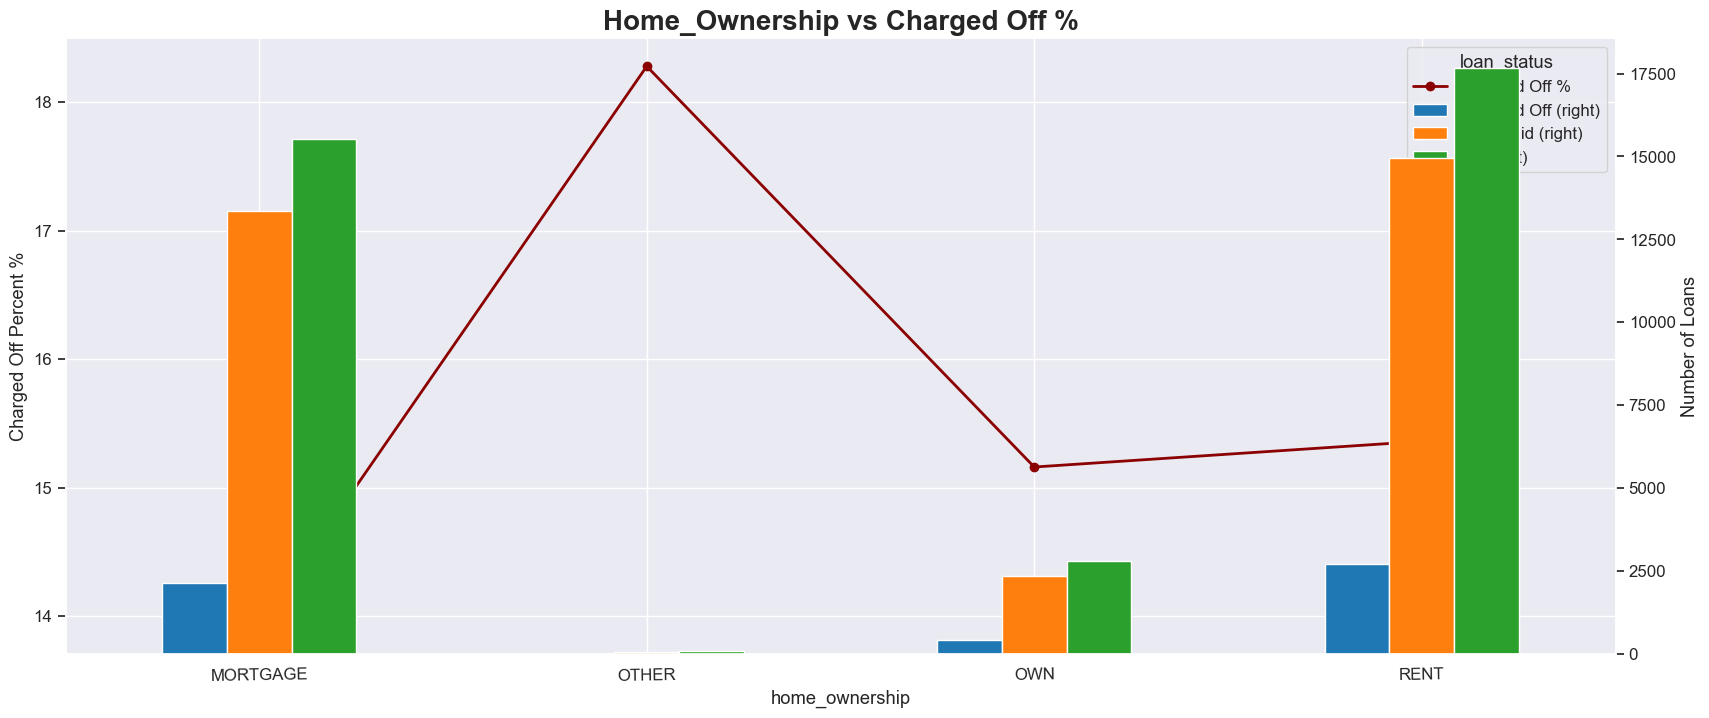

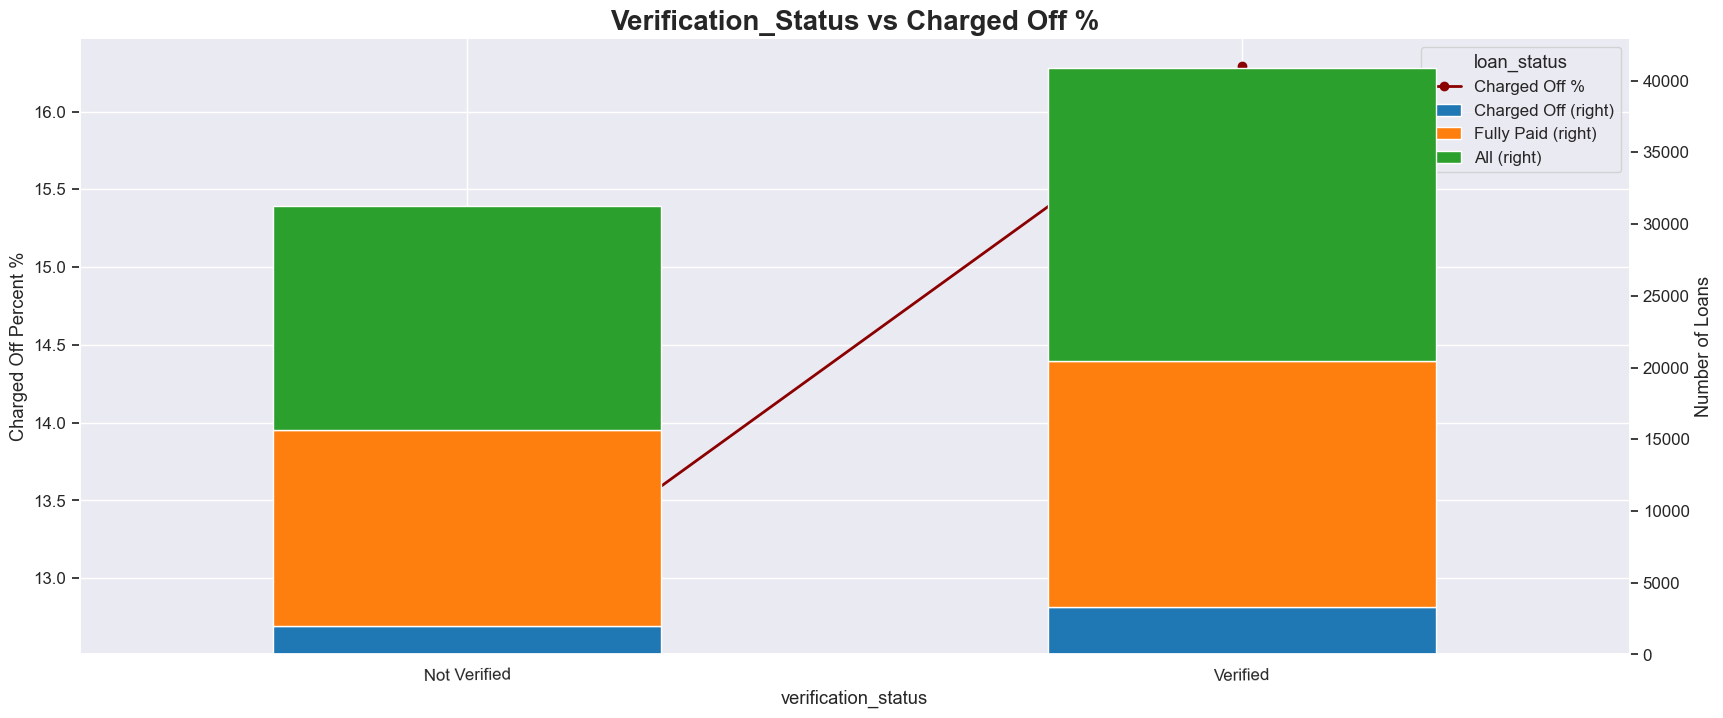

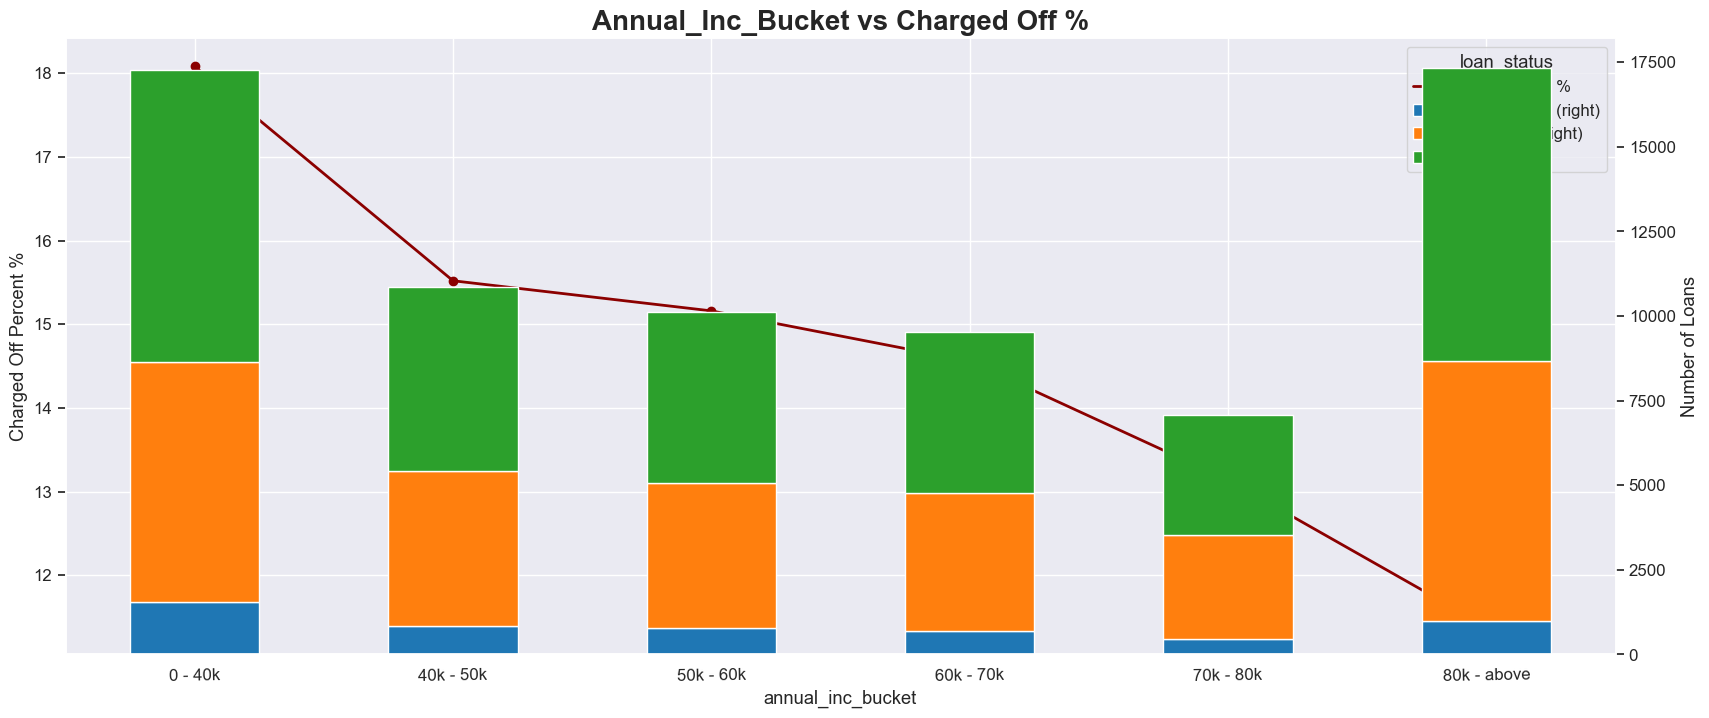

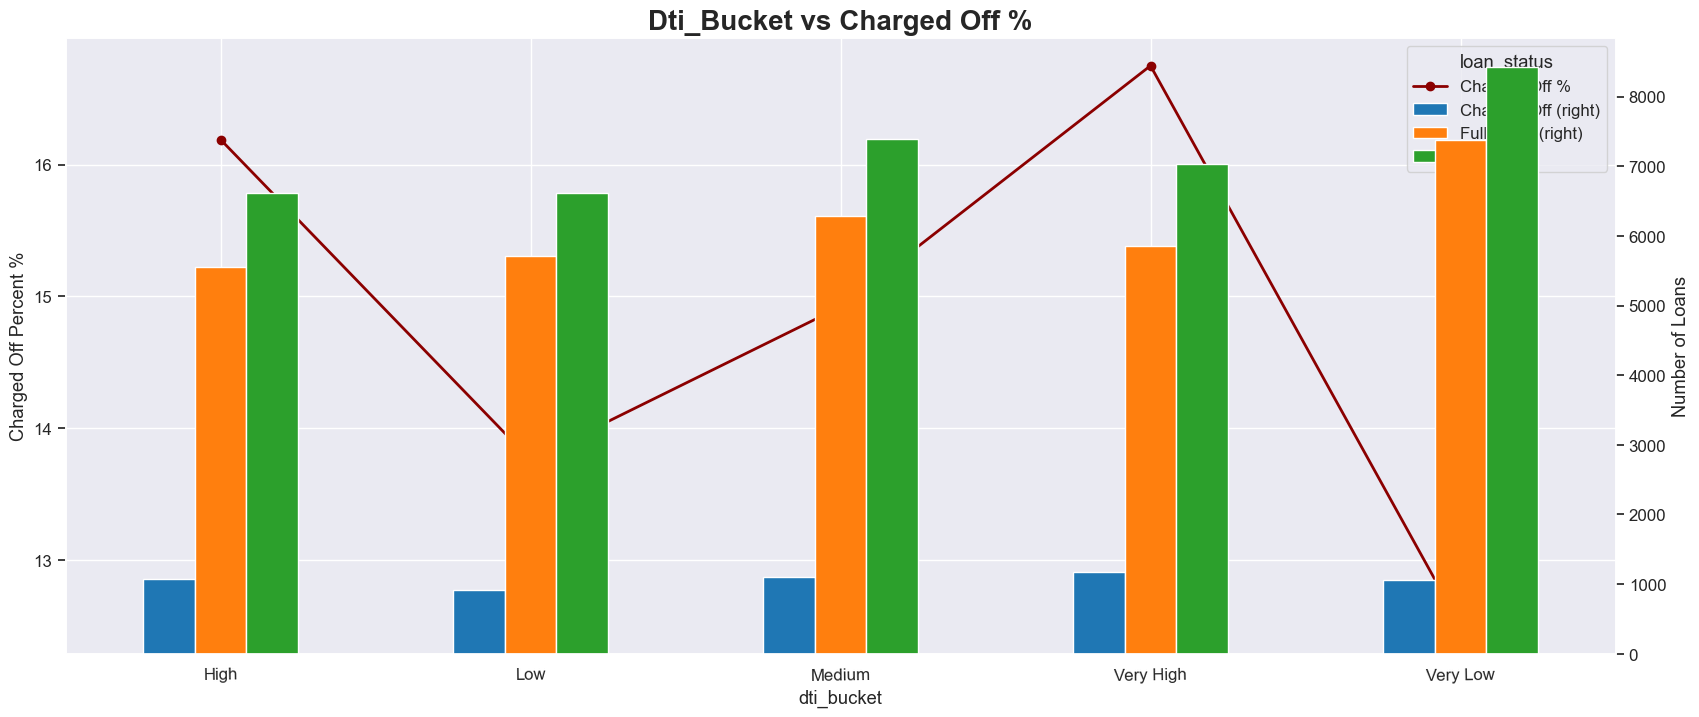

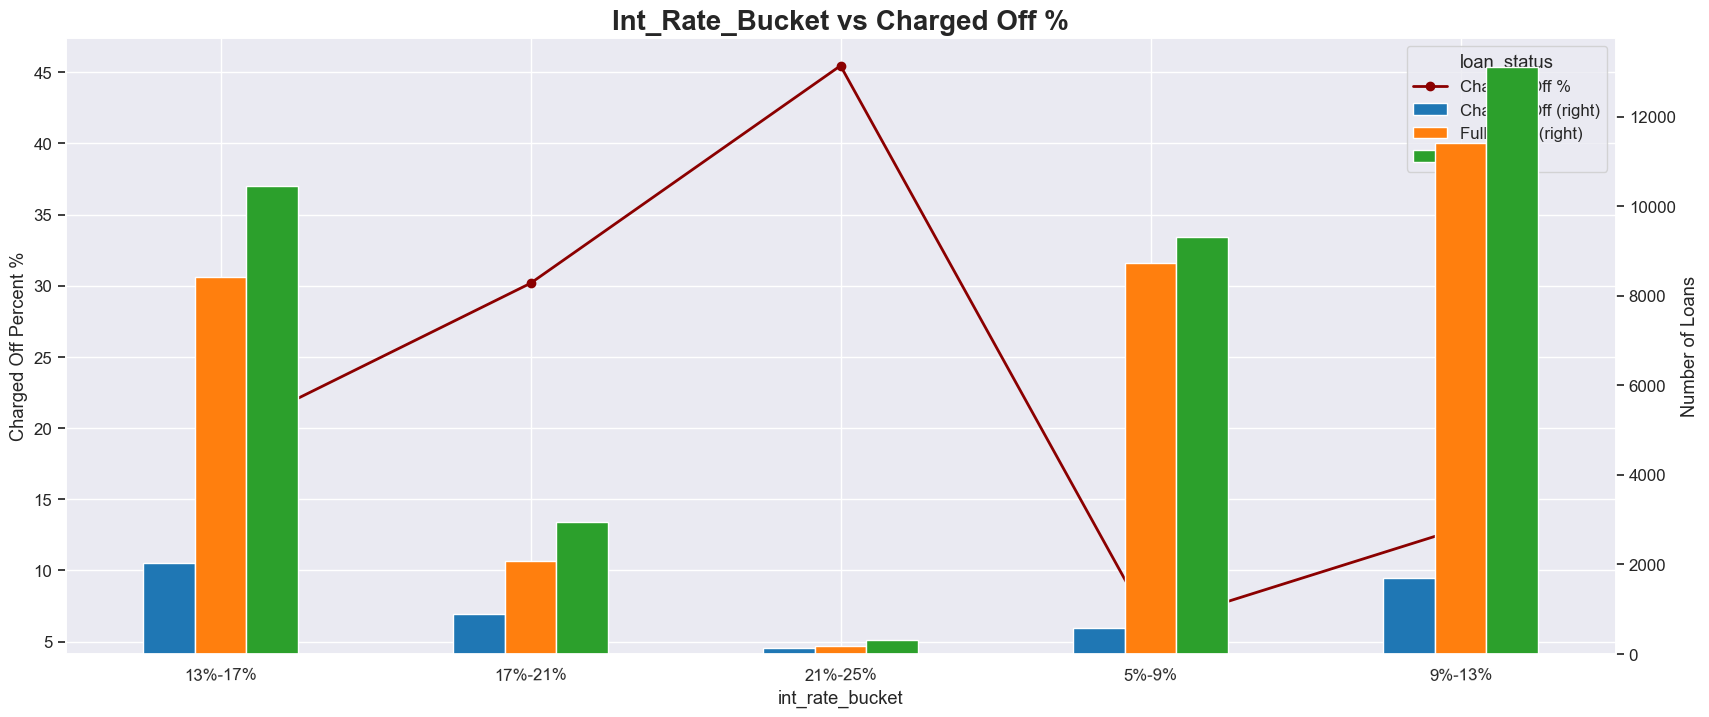

In [865]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    charged_off_percentage_plot(loan_df, column, stacked)


### Summary of Multivariate Analysis

- The likelihood of loan default increases as the interest rate rises.
- Borrowers with 10 years of experience exhibit the highest tendency to default on their loans.
- Borrowers from subgrades B3, B4, and B5 have the greatest propensity to default.
- Loan applicants from states such as CA, FL, and NJ are more likely to default on their loans.
- Individuals living in rented houses have the highest likelihood of defaulting on loans.
- Borrowers in lower income brackets are more prone to default, with the default tendency generally decreasing as annual income increases.
- Applicants belonging to credit grades B, C, and D are more likely to default on their loans.
